In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Sección nueva

In [ ]:
!pip install pandas
import pandas as pd

In [ ]:
!pip -q install pyreadstat
import numpy as np
import pyreadstat
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Ruta base a los arhivos para importarlo:
archivos = Path("/content/drive/Shareddrives/Casinos/Ciencia de datos tp")

# Rutas

individual2025_archivos = archivos/"usu_individual_T125.xlsx"
indiv_2005_archivos = archivos/"Individual_t105.dta"
hogar2025_archivos = archivos/"usu_hogar_T125.xlsx"
hogar_2005_archivos = archivos/"Hogar_t105.dta"

In [ ]:
#Leer el excel 2025
#hogar_2025 = pd.read_excel(hogar2025_archivos)
indiv_2025 = pd.read_excel(individual2025_archivos)

In [ ]:
#Leer el stata 2005
indiv_2005, meta_2005 = pyreadstat.read_dta(str(indiv_2005_archivos))
hogar_2005, meta_hogar_2005 = pyreadstat.read_dta(str(hogar_2005_archivos))

In [ ]:
#Algunas variables estaban mitad mayuscula y mitad minuscula

indiv_2005.columns = [c.upper() for c in indiv_2005.columns]
#hogar_2005.columns = [c.upper() for c in hogar_2005.columns]

In [ ]:
#filtramos por la region 42 (cuyo)
def filtrar_region_42(df):
    if "REGION" in df.columns:
        region_col = "REGION"
    else:
        raise KeyError(f"El DataFrame no tiene la columna 'REGION' ni 'region'. Columnas disponibles: {list(df.columns)}")
    return df[pd.to_numeric(df[region_col], errors="coerce") == 42].copy()

#hogar_2005 = filtrar_region_42(hogar_2005)
indiv_2005 = filtrar_region_42(indiv_2005)
#hogar_2025 = filtrar_region_42(hogar_2025)
indiv_2025 = filtrar_region_42(indiv_2025)


In [ ]:
# Unimos hogar con individual para 2005
#data_2005 = pd.merge(indiv_2005,hogar_2005,on=["CODUSU", "NRO_HOGAR"],how="left",   # así no perdés personas aunque falte info de hogarsuffixes=("", "_HOG"),)

# Unimos hogar con individual para 2025
#data_2025 = pd.merge(indiv_2025,hogar_2025,on=["CODUSU", "NRO_HOGAR"],how="left",suffixes=("", "_HOG"),)
data_2005 = indiv_2005
data_2025 = indiv_2025
print(data_2005.shape)
print(data_2025.shape)

(4865, 176)
(4594, 235)


In [ ]:
print(data_2025["CODUSU"].head(20))
print(data_2025["CODUSU"].dtype)

29    TQRMNOPRQHJKKMCDEHNHB00876393
30    TQRMNOPRQHJKKMCDEHNHB00876393
56    TQRMNOQSYHJOKQCDEHNHB00876367
57    TQRMNOQSYHJOKQCDEHNHB00876367
58    TQRMNOQSYHJOKQCDEHNHB00876367
59    TQRMNOQSYHJOKQCDEHNHB00876367
60    TQRMNOQQXHMMKTCDEHNHB00877747
61    TQRMNOPQRHJKKRCDEHNHB00877748
62    TQRMNOPQRHJKKRCDEHNHB00877748
63    TQRMNOPQRHJKKRCDEHNHB00877748
64    TQRMNOPWQHMLKUCDEHNHB00877749
65    TQRMNOPWQHMLKUCDEHNHB00877749
66    TQRMNOPWQHMLKUCDEHNHB00877749
67    TQRMNOSTSHLOKTCDEHNHB00854331
68    TQRMNOSTSHLOKTCDEHNHB00854331
69    TQRMNOSTSHLOKTCDEHNHB00854331
84    TQRMNOUUPHLOLLCDEHNHB00857766
85    TQRMNOUUPHLOLLCDEHNHB00857766
86    TQRMNOUUPHLOLLCDEHNHB00857766
87    TQRMNOPVXHKOKQCDEHNHB00857634
Name: CODUSU, dtype: object
object


In [ ]:
#duplicados_2005 = [c for c in data_2005.columns if c.endswith("_HOG")]
#print (duplicados_2005)

#columnas repetidas entre hogar e individual para 2005

In [ ]:
#duplicados_2025 = [c for c in data_2025.columns if c.endswith("_HOG")]
#print (duplicados_2025)

#columnas repetidas entre hogar e individual para 2025

In [ ]:
# Lista de columnas duplicadas a eliminar
#cols_drop_2005 = [c for c in data_2005.columns if c.endswith("_HOG")]
#cols_drop_2025 = [c for c in data_2025.columns if c.endswith("_HOG")]

# Eliminar duplicadas
#data_2005 = data_2005.drop(columns=cols_drop_2005)
#data_2025 = data_2025.drop(columns=cols_drop_2025)

#print("Columnas finales 2005:", data_2005.shape[1])
#print("Columnas finales 2025:", data_2025.shape[1])

#Ya con esto quedaron dos bases data_2005 y data_2025 para trabajar

In [ ]:
#Me quedo unicamente con las variables en común
comunes = sorted(set(data_2005.columns).intersection(set(data_2025.columns)))

data_2005 = data_2005[comunes].copy()
data_2025 = data_2025[comunes].copy()

print("Columnas 2005:", data_2005.shape[1])
print("Columnas 2025:", data_2025.shape[1])

Columnas 2005: 168
Columnas 2025: 168


In [ ]:
# Queremos que nos queden las variables del mismo tipo para 2005 y 2025 (float, int, etc)
# Este codigo busca que variables tienen que ser float, string (codusu) y el resto int

# Identificar columnas de ingresos/montos (float)
ingresos = [c for c in data_2005.columns if any(x in c for x in [
    "ITF", "IPCF", "P47T", "P21", "T_VI", "TOT_P12",
    "_M",  # todas las variables monetarias
    "PP06", "PP08", "PP03", "PP04", "PP05"  # módulos de ocupación con ingresos
])]

import pandas as pd

# Pasar la lista a un DataFrame
df_ingresos = pd.DataFrame({"Variables_ingresos": ingresos})

# Mostrar
display(df_ingresos)




tipos_correctos = {}

for col in data_2005.columns:
    if col == "CODUSU":
        tipos_correctos[col] = "string"
    elif col in ingresos:
        tipos_correctos[col] = "float64"
    else:
        tipos_correctos[col] = "Int64"

# Aplicar a ambas bases
for col, tipo in tipos_correctos.items():
    if col == "CODUSU":
        # Pasar a string directo, sin coerción numérica
        data_2005[col] = data_2005[col].astype("string")
        data_2025[col] = data_2025[col].astype("string")
    else:
        data_2005[col] = pd.to_numeric(data_2005[col], errors="coerce").astype(tipo)
        data_2025[col] = pd.to_numeric(data_2025[col], errors="coerce").astype(tipo)

# Verificar
print("2005:\n", data_2005.dtypes.value_counts())
print("2025:\n", data_2025.dtypes.value_counts())


,Variables_ingresos
0,IPCF
1,ITF
2,P21
3,P47T
4,PP03C
5,PP03D
6,PP03G
7,PP03H
8,PP03I
9,PP03J


2005:
 Int64             114
float64            53
string[python]      1
Name: count, dtype: int64
2025:
 Int64             114
float64            53
string[python]      1
Name: count, dtype: int64


In [ ]:
print(data_2025["CODUSU"].head(20))
print(data_2025["CODUSU"].dtype)

29    TQRMNOPRQHJKKMCDEHNHB00876393
30    TQRMNOPRQHJKKMCDEHNHB00876393
56    TQRMNOQSYHJOKQCDEHNHB00876367
57    TQRMNOQSYHJOKQCDEHNHB00876367
58    TQRMNOQSYHJOKQCDEHNHB00876367
59    TQRMNOQSYHJOKQCDEHNHB00876367
60    TQRMNOQQXHMMKTCDEHNHB00877747
61    TQRMNOPQRHJKKRCDEHNHB00877748
62    TQRMNOPQRHJKKRCDEHNHB00877748
63    TQRMNOPQRHJKKRCDEHNHB00877748
64    TQRMNOPWQHMLKUCDEHNHB00877749
65    TQRMNOPWQHMLKUCDEHNHB00877749
66    TQRMNOPWQHMLKUCDEHNHB00877749
67    TQRMNOSTSHLOKTCDEHNHB00854331
68    TQRMNOSTSHLOKTCDEHNHB00854331
69    TQRMNOSTSHLOKTCDEHNHB00854331
84    TQRMNOUUPHLOLLCDEHNHB00857766
85    TQRMNOUUPHLOLLCDEHNHB00857766
86    TQRMNOUUPHLOLLCDEHNHB00857766
87    TQRMNOPVXHKOKQCDEHNHB00857634
Name: CODUSU, dtype: string
string


In [ ]:
negativos_2005 = {}
negativos_2025 = {}

for col in data_2005.columns:
    if pd.api.types.is_numeric_dtype(data_2005[col]):
        vals = data_2005[col].dropna().unique()
        vals_neg = [v for v in vals if v < 0]
        if len(vals_neg) > 0:
            negativos_2005[col] = vals_neg

for col in data_2025.columns:
    if pd.api.types.is_numeric_dtype(data_2025[col]):
        vals = data_2025[col].dropna().unique()
        vals_neg = [v for v in vals if v < 0]
        if len(vals_neg) > 0:
            negativos_2025[col] = vals_neg

print("Variables con negativos en 2005:", negativos_2005)
print("Variables con negativos en 2025:", negativos_2025)


Variables con negativos en 2005: {'CH06': [np.int64(-1)], 'PP06C': [np.float64(-8.0), np.float64(-7.0)], 'PP06D': [np.float64(-8.0)]}
Variables con negativos en 2025: {'CH06': [np.int64(-1)], 'P21': [np.float64(-9.0)], 'P47T': [np.float64(-9.0)], 'PP06C': [np.float64(-9.0), np.float64(-8.0), np.float64(-7.0)], 'PP06D': [np.float64(-9.0), np.float64(-7.0), np.float64(-8.0)], 'PP08D1': [np.float64(-9.0)], 'PP08F1': [np.float64(-9.0)], 'PP08F2': [np.float64(-9.0)], 'PP08J1': [np.float64(-9.0)], 'TOT_P12': [np.float64(-9.0)], 'T_VI': [np.float64(-9.0)], 'V10_M': [np.float64(-9.0)], 'V12_M': [np.float64(-9.0)], 'V18_M': [np.float64(-9.0)], 'V4_M': [np.float64(-9.0)], 'V8_M': [np.float64(-9.0)]}


In [ ]:
# Tomamos solo las columnas que son numéricas (int o float)
num_cols_2005 = data_2005.select_dtypes(include=["Int64","float64"]).columns
num_cols_2025 = data_2025.select_dtypes(include=["Int64","float64"]).columns

# Chequear valores negativos
negativos_2005 = (data_2005[num_cols_2005] < 0).sum()
negativos_2025 = (data_2025[num_cols_2025] < 0).sum()

print("Negativos en 2005:\n", negativos_2005[negativos_2005 > 0])
print("\nNegativos en 2025:\n", negativos_2025[negativos_2025 > 0])

#Estamos viendo cuales son las variables que tienen valores negativos para poder ver si son codigos de no respuesta

Negativos en 2005:
 CH06     83
PP06C    15
PP06D     5
dtype: Int64

Negativos en 2025:
 CH06        40
P21        330
P47T       423
PP06C       89
PP06D       48
PP08D1     199
PP08F1      13
PP08F2       8
PP08J1      42
TOT_P12     52
T_VI        83
V10_M        4
V12_M       24
V18_M        1
V4_M         1
V8_M        10
dtype: Int64


In [ ]:
#cambia los codigos de no respuesta por NaN (Ya verificamos que son codigos de no respuesta)

codigos_na = [-1, -7, -8, -9]

for col in data_2005.select_dtypes(include=["Int64","float64"]).columns:
    data_2005[col] = data_2005[col].replace(codigos_na, np.nan)

for col in data_2025.select_dtypes(include=["Int64","float64"]).columns:
    data_2025[col] = data_2025[col].replace(codigos_na, np.nan)


In [ ]:
# Contar NaNs en cada variable
nans_2005 = data_2005.isna().sum().sort_values(ascending=False)
nans_2025 = data_2025.isna().sum().sort_values(ascending=False)

# Juntar en un DataFrame comparativo
resumen_nans = pd.DataFrame({
    "NaNs_2005": nans_2005,
    "NaNs_2025": nans_2025
})

# Configuración para mostrar todas las filas y columnas
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

print(resumen_nans)

            NaNs_2005  NaNs_2025
ADECCFR             0          0
ADECIFR             0          0
ADECINDR            0          0
ADECOCUR         2949          0
AGLOMERADO          0          0
ANO4                0          0
CAT_INAC            0          0
CAT_OCUP            0          0
CH03                0          0
CH04                0          0
CH06               83         40
CH07                0          0
CH08                0          1
CH09                0          0
CH10                0          0
CH11                0          0
CH12                0          0
CH13                0          0
CH14             2337       2287
CH15                0          0
CH15_COD         4208       4090
CH16                0          0
CH16_COD         4736       4557
CODUSU              0          0
COMPONENTE          0          0
DECCFR              0          0
DECIFR              0          0
DECINDR             0          0
DECOCUR          2949          0
ESTADO    

In [ ]:
# Contar ceros y NaNs en cada variable
reporte = pd.DataFrame({
    "Ceros_2005": (data_2005 == 0).sum(),
    "NaNs_2005": data_2005.isna().sum(),
    "Ceros_2025": (data_2025 == 0).sum(),
    "NaNs_2025": data_2025.isna().sum()
})

# Detectar casos sospechosos:
# - Muchos NaNs y casi ningún cero en un año
# - Muchos ceros y casi ningún NaN en el otro
sospechosos = reporte[
    ((reporte["NaNs_2005"] > 100) & (reporte["Ceros_2005"] < 5) & (reporte["Ceros_2025"] > 100) & (reporte["NaNs_2025"] < 5))
    |
    ((reporte["NaNs_2025"] > 100) & (reporte["Ceros_2025"] < 5) & (reporte["Ceros_2005"] > 100) & (reporte["NaNs_2005"] < 5))
]

print(sospechosos)


         Ceros_2005  NaNs_2005  Ceros_2025  NaNs_2025
INTENSI        2949          0           0       2527
PP03G          2949          0           0       2527
PP03I          2949          0           0       2527
PP03J          2949          0           0       2527
PP04A          2949          0           0       2527
PP04B1         2949          0           0       2527
PP10A          4698          0           0       4473
PP10C          4698          0           0       4473


con esto únicamente hace falta volver a generar respondieron y norespondieron para sacar pobreza de nuevo



***ACÁ SACAMOS RESPONDIERON Y NO RESPONDIERON***

In [ ]:
# Para 2005
norespondieron05 = data_2005[(data_2005["ITF"].isna()) | (data_2005["ITF"] == 0)].copy()
respondieron05 = data_2005[(~data_2005["ITF"].isna()) & (data_2005["ITF"] != 0)].copy()

# Para 2025
norespondieron25 = data_2025[(data_2025["ITF"].isna()) | (data_2025["ITF"] == 0)].copy()
respondieron25 = data_2025[(~data_2025["ITF"].isna()) & (data_2025["ITF"] != 0)].copy()

# Chequeo rápido de tamaños
print("2005:", len(norespondieron05), "no respondieron |", len(respondieron05), "respondieron")
print("2025:", len(norespondieron25), "no respondieron |", len(respondieron25), "respondieron")


2005: 35 no respondieron | 4830 respondieron
2025: 1063 no respondieron | 3531 respondieron


In [ ]:
# Leer base de equivalencias
tabla_equiv = pd.read_excel(archivos / "tabla_adulto_equiv (1).xlsx")

# Aseguramos nombres claros de columnas
tabla_equiv.columns = ["EDAD", "MUJERES", "VARONES"]

# Función para mapear edad + sexo a adulto_equiv
def asignar_adulto_equiv(row, tabla=tabla_equiv):
    edad = row["CH06"]
    sexo = row["CH04"]  # 1 = hombre, 2 = mujer

    if sexo == 1:  # hombre → usar columna VARONES
        valor = tabla.loc[tabla["EDAD"] == edad, "VARONES"]
    elif sexo == 2:  # mujer → usar columna MUJERES
        valor = tabla.loc[tabla["EDAD"] == edad, "MUJERES"]
    else:
        return None  # si CH04 no es 0 o 1

    # Si no encuentra edad en la tabla
    if valor.empty:
        return None
    return valor.values[0]

#Crear la nueva columna en base_2005
data_2025['adulto_equiv'] = data_2025.apply(asignar_adulto_equiv, axis=1)
data_2005['adulto_equiv'] = data_2005.apply(asignar_adulto_equiv, axis=1)

In [ ]:
# Para 2005
data_2005["ad_equiv_hogar"] = (
    data_2005.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform("sum")
)

# Para 2025
data_2025["ad_equiv_hogar"] = (
    data_2025.groupby(["CODUSU", "NRO_HOGAR"])["adulto_equiv"].transform("sum")
)

# Chequeo rápido
print(data_2005[["CODUSU", "NRO_HOGAR", "CH04", "CH06", "adulto_equiv", "ad_equiv_hogar"]].head(20))
print(data_2025[["CODUSU", "NRO_HOGAR", "CH04", "CH06", "adulto_equiv", "ad_equiv_hogar"]].head(20))


       CODUSU  NRO_HOGAR  CH04  CH06  adulto_equiv  ad_equiv_hogar
24285  125264          1     1    56          1.00            1.00
24286  125266          1     2    80          0.63            0.63
24287  125356          2     1    56          1.00            3.98
24288  125356          2     2    40          0.77            3.98
24289  125356          2     1    12          0.85            3.98
24290  125356          2     2    10          0.70            3.98
24291  125356          2     2     7          0.66            3.98
24292  125654          1     1    80          0.74            1.37
24293  125654          1     2    76          0.63            1.37
24294  126032          1     1    29          1.02            1.02
24295  126391          1     1    46          1.00            5.14
24296  126391          1     2    45          0.77            5.14
24297  126391          1     1    24          1.02            5.14
24298  126391          1     2    20          0.76            

In [ ]:
#Filtrar respondieron y norespondieron
respondieron05 = data_2005[(data_2005["ITF"].notna()) & (data_2005["ITF"] != 0)].copy()
norespondieron05 = data_2005[(data_2005["ITF"].isna()) | (data_2005["ITF"] == 0)].copy()

respondieron25 = data_2025[(data_2025["ITF"].notna()) & (data_2025["ITF"] != 0)].copy()
norespondieron25 = data_2025[(data_2025["ITF"].isna()) | (data_2025["ITF"] == 0)].copy()

#Ingreso necesario (valores fijos por año)
respondieron05["ingreso_necesario"] = 205.07 * respondieron05["ad_equiv_hogar"]
respondieron25["ingreso_necesario"] = 365177 * respondieron25["ad_equiv_hogar"]

#Variable POBRE
respondieron05["POBRE"] = (respondieron05["ingreso_necesario"] > respondieron05["ITF"]).astype("Int64")
respondieron25["POBRE"] = (respondieron25["ingreso_necesario"] > respondieron25["ITF"]).astype("Int64")


#A los que no respondieron → NaN
norespondieron05["POBRE"] = pd.NA
norespondieron25["POBRE"] = pd.NA


In [ ]:
respondieron05.head()

,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,ANO4,CAT_INAC,CAT_OCUP,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,CODUSU,COMPONENTE,DECCFR,DECIFR,DECINDR,DECOCUR,ESTADO,GDECCFR,GDECIFR,GDECINDR,GDECOCUR,H15,IDECCFR,IDECIFR,IDECINDR,IDECOCUR,INTENSI,IPCF,ITF,MAS_500,NIVEL_ED,NRO_HOGAR,P21,P47T,PDECCFR,PDECIFR,PDECINDR,PDECOCUR,PONDERA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP03G,PP03H,PP03I,PP03J,PP04A,PP04B1,PP04B2,PP04B3_ANO,PP04B3_DIA,PP04B3_MES,PP04B_COD,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_ANO,PP05B2_DIA,PP05B2_MES,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,PP08J3,PP09A,PP09A_ESP,PP09B,PP09C,PP09C_ESP,PP10A,PP10C,PP10D,PP10E,PP11A,PP11B1,PP11B2_ANO,PP11B2_DIA,PP11B2_MES,PP11B_COD,PP11C,PP11C99,PP11D_COD,PP11G_ANO,PP11G_DIA,PP11G_MES,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,PP3E_TOT,PP3F_TOT,RDECCFR,RDECIFR,RDECINDR,RDECOCUR,REGION,TOT_P12,TRIMESTRE,T_VI,V10_M,V12_M,V18_M,V19_AM,V3_M,V4_M,V8_M,V9_M,adulto_equiv,ad_equiv_hogar,ingreso_necesario,POBRE
24285,10,9,10,10,10,2005,0,3,1,1,56,3,1,1,2,0,4,1,<NA>,3,6,1,<NA>,125264,1,10,9,10,10,1,10,9,10,10,1,10,9,10,10,4,2200.0,2200.0,<NA>,4,1,2200.0,2200.0,<NA>,<NA>,<NA>,<NA>,319,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,6003.0,11.0,0.0,11331.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,0,0,1,2,2,2,0,1,1,1,1,0,1,0,1,1,2200.0,200.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,60,0,10,9,10,10,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,1.00,205.0700,0
24286,5,1,3,<NA>,10,2005,1,0,1,2,80,4,1,1,2,0,2,2,4,2,<NA>,1,<NA>,125266,1,5,1,3,<NA>,3,4,1,3,<NA>,1,5,1,3,<NA>,0,290.0,290.0,<NA>,1,1,0.0,290.0,<NA>,<NA>,<NA>,<NA>,326,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,3,<NA>,42,0.0,1,290.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.63,0.63,129.1941,0
24287,6,8,7,6,10,2005,0,2,1,1,56,1,4,1,2,0,2,2,5,2,<NA>,1,<NA>,125356,1,5,8,7,5,1,5,8,7,5,1,6,8,7,6,3,320.0,1600.0,<NA>,1,2,550.0,750.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,5310.0,1.0,0.0,33114.0,2.0,0.0,0.0,0.0,3.0,2.0,3.0,1.0,7.0,2.0,2.0,550.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,36,4,6,8,7,6,42,200.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,3.98,816.1786,0
24288,6,8,8,8,10,2005,0,3,2,2,40,1,1,1,2,0,4,1,<NA>,1,<NA>,1,<NA>,125356,2,5,8,8,8,1,5,8,8,8,1,6,8,8,8,4,320.0,1600.0,<NA>,4,2,850.0,850.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1502.0,8.0,0.0,80323.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,2,0,0,2,2,2,2,5,1,1,1,1,0,1,0,1,1,850.0,150.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,60,0,6,8,8,8,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.77,3.98,816.1786,0
24289,6,8,0,<NA>,10,2005,3,0,3,1,12,5,1,1,1,1,9,2,5,1,<NA>,1,<NA>,125356,3,5,8,0,<NA>,3,5,8,0,<NA>,1,6,8,0,<NA>,0,320.0,1600.0,<NA>,1,2,0.0,0.0,<NA>,<NA>,<NA>,<NA>,327,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,6,8,0,<NA>,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.85,3.98,816.1786,0


In [ ]:
#Crear columna POBRE en data_2005 y data_2025 con NaN por defecto
data_2005["POBRE"] = pd.NA
data_2025["POBRE"] = pd.NA

#Asignar valores desde respondieron
data_2005.loc[respondieron05.index, "POBRE"] = respondieron05["POBRE"]
data_2025.loc[respondieron25.index, "POBRE"] = respondieron25["POBRE"]

data_2005["ingreso_necesario"] = 205.07 * data_2005["ad_equiv_hogar"]
data_2025["ingreso_necesario"] = 365177 * data_2025["ad_equiv_hogar"]


#Chequeo: distribución de la nueva variable
print("2005 - POBRE:")
print(data_2005["POBRE"].value_counts(dropna=False))

print("\n2025 - POBRE:")
print(data_2025["POBRE"].value_counts(dropna=False))

#Vista previa
print(data_2005[["CODUSU", "NRO_HOGAR", "ITF", "ingreso_necesario", "POBRE"]].head(10))
print(data_2025[["CODUSU", "NRO_HOGAR", "ITF", "ingreso_necesario", "POBRE"]].head(10))

2005 - POBRE:
POBRE
0       3155
1       1675
<NA>      35
Name: count, dtype: int64

2025 - POBRE:
POBRE
0       2050
1       1481
<NA>    1063
Name: count, dtype: int64
       CODUSU  NRO_HOGAR     ITF  ingreso_necesario POBRE
24285  125264          1  2200.0           205.0700     0
24286  125266          1   290.0           129.1941     0
24287  125356          2  1600.0           816.1786     0
24288  125356          2  1600.0           816.1786     0
24289  125356          2  1600.0           816.1786     0
24290  125356          2  1600.0           816.1786     0
24291  125356          2  1600.0           816.1786     0
24292  125654          1   440.0           280.9459     0
24293  125654          1   440.0           280.9459     0
24294  126032          1   800.0           209.1714     0
                           CODUSU  NRO_HOGAR        ITF  ingreso_necesario  \
29  TQRMNOPRQHJKKMCDEHNHB00876393          1        0.0         1460708.00   
30  TQRMNOPRQHJKKMCDEHNHB00876393  

In [ ]:
def resumen_pobre(df, col="POBRE"):
    n_total = len(df)
    n_pobres = (df[col] == 1).sum()
    n_no_pobres = (df[col] == 0).sum()
    n_nans = df[col].isna().sum()

    return pd.Series({
        "Observaciones totales": n_total,
        "Pobres (1)": n_pobres,
        "No pobres (0)": n_no_pobres,
        "NaN (sin respuesta)": n_nans,
        "% Pobres (sobre válidos)": round(n_pobres / (n_pobres + n_no_pobres) * 100, 2) if (n_pobres + n_no_pobres) > 0 else pd.NA,
        "% No pobres (sobre válidos)": round(n_no_pobres / (n_pobres + n_no_pobres) * 100, 2) if (n_pobres + n_no_pobres) > 0 else pd.NA,
        "% NaN (sobre total)": round(n_nans / n_total * 100, 2) if n_total > 0 else pd.NA
    })

#Crear tablas comparativas
tabla_2005 = resumen_pobre(data_2005)
tabla_2025 = resumen_pobre(data_2025)

tabla_pobre = pd.DataFrame([tabla_2005, tabla_2025], index=["2005", "2025"])
display(tabla_pobre)


,Observaciones totales,Pobres (1),No pobres (0),NaN (sin respuesta),% Pobres (sobre válidos),% No pobres (sobre válidos),% NaN (sobre total)
2005,4865.0,1675.0,3155.0,35.0,34.68,65.32,0.72
2025,4594.0,1481.0,2050.0,1063.0,41.94,58.06,23.14


In [ ]:
#Aca ya nos quedó la variable Pobre incluida en data_2005 y data_2025 con NaNs para los casos donde no se haya informado ITF

#Ya estamos para concatenar todo en un nuevo df data_final

# Agregar columna ANIO
data_2005["ANIO"] = 2005
data_2025["ANIO"] = 2025

# Concatenar
data_final = pd.concat([data_2005, data_2025], ignore_index=True)

# Chequeo rápido
#print(data_final["ANIO"].value_counts())
print(data_final.head())


   ADECCFR  ADECIFR  ADECINDR  ADECOCUR  AGLOMERADO  ANO4  CAT_INAC  CAT_OCUP  \
0       10        9        10        10          10  2005         0         3   
1        5        1         3      <NA>          10  2005         1         0   
2        6        8         7         6          10  2005         0         2   
3        6        8         8         8          10  2005         0         3   
4        6        8         0      <NA>          10  2005         3         0   

   CH03  CH04  CH06  CH07  CH08  CH09  CH10  CH11  CH12  CH13  CH14  CH15  \
0     1     1    56     3     1     1     2     0     4     1  <NA>     3   
1     1     2    80     4     1     1     2     0     2     2     4     2   
2     1     1    56     1     4     1     2     0     2     2     5     2   
3     2     2    40     1     1     1     2     0     4     1  <NA>     1   
4     3     1    12     5     1     1     1     1     9     2     5     1   

   CH15_COD  CH16  CH16_COD  CODUSU  COMPONENTE  D

In [ ]:
data_final.sample(30, random_state=42)

,ADECCFR,ADECIFR,ADECINDR,ADECOCUR,AGLOMERADO,ANO4,CAT_INAC,CAT_OCUP,CH03,CH04,CH06,CH07,CH08,CH09,CH10,CH11,CH12,CH13,CH14,CH15,CH15_COD,CH16,CH16_COD,CODUSU,COMPONENTE,DECCFR,DECIFR,DECINDR,DECOCUR,ESTADO,GDECCFR,GDECIFR,GDECINDR,GDECOCUR,H15,IDECCFR,IDECIFR,IDECINDR,IDECOCUR,INTENSI,IPCF,ITF,MAS_500,NIVEL_ED,NRO_HOGAR,P21,P47T,PDECCFR,PDECIFR,PDECINDR,PDECOCUR,PONDERA,PP02C1,PP02C2,PP02C3,PP02C4,PP02C5,PP02C6,PP02C7,PP02C8,PP02E,PP02H,PP02I,PP03C,PP03D,PP03G,PP03H,PP03I,PP03J,PP04A,PP04B1,PP04B2,PP04B3_ANO,PP04B3_DIA,PP04B3_MES,PP04B_COD,PP04C,PP04C99,PP04D_COD,PP04G,PP05B2_ANO,PP05B2_DIA,PP05B2_MES,PP05C_1,PP05C_2,PP05C_3,PP05E,PP05F,PP05H,PP06A,PP06C,PP06D,PP06E,PP06H,PP07A,PP07C,PP07D,PP07E,PP07F1,PP07F2,PP07F3,PP07F4,PP07F5,PP07G1,PP07G2,PP07G3,PP07G4,PP07G_59,PP07H,PP07I,PP07J,PP07K,PP08D1,PP08D4,PP08F1,PP08F2,PP08J1,PP08J2,PP08J3,PP09A,PP09A_ESP,PP09B,PP09C,PP09C_ESP,PP10A,PP10C,PP10D,PP10E,PP11A,PP11B1,PP11B2_ANO,PP11B2_DIA,PP11B2_MES,PP11B_COD,PP11C,PP11C99,PP11D_COD,PP11G_ANO,PP11G_DIA,PP11G_MES,PP11L,PP11L1,PP11M,PP11N,PP11O,PP11P,PP11Q,PP11R,PP11S,PP11T,PP3E_TOT,PP3F_TOT,RDECCFR,RDECIFR,RDECINDR,RDECOCUR,REGION,TOT_P12,TRIMESTRE,T_VI,V10_M,V12_M,V18_M,V19_AM,V3_M,V4_M,V8_M,V9_M,adulto_equiv,ad_equiv_hogar,POBRE,ingreso_necesario,ANIO
4078,5,6,0,<NA>,27,2005,6,0,2,2,60,2,1,1,2,0,2,1,<NA>,1,<NA>,1,<NA>,207441,2,4,5,0,<NA>,3,<NA>,<NA>,<NA>,<NA>,1,4,6,0,<NA>,0,217.500000,870.0,<NA>,2,1,0.0,0.0,5,6,0,<NA>,275,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,0,<NA>,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.76,3.38,0,6.931366e+02,2005
4132,4,6,0,<NA>,27,2005,3,0,3,1,13,5,1,1,1,1,3,2,7,1,<NA>,1,<NA>,213548,5,3,5,0,<NA>,3,<NA>,<NA>,<NA>,<NA>,1,3,6,0,<NA>,0,180.000000,900.0,<NA>,2,1,0.0,0.0,4,6,0,<NA>,231,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,0,0,0,0,0,0,0,0,0.0,<NA>,0,0,<NA>,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,4,6,0,<NA>,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.90,4.71,1,9.658797e+02,2005
7415,7,10,3,0,27,2025,6,0,9,1,51,5,3,1,2,0,2,1,<NA>,1,<NA>,1,<NA>,TQRMNOPTQHMMLOCDEHNHB00880504,6,6,9,2,0,3,6,9,2,0,1,6,10,2,0,<NA>,494166.670000,2965000.0,<NA>,2,1,0.0,265000.0,<NA>,<NA>,<NA>,<NA>,395,0,0,0,0,0,0,0,0,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7,10,2,0,42,0.0,1,265000.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,5.55,0,2.026732e+06,2025
7023,3,3,6,6,10,2025,0,2,1,1,33,1,4,1,2,0,4,1,<NA>,1,<NA>,1,<NA>,TQRMNOQRXHMOLQCDEGGFB00879882,1,3,3,5,5,1,3,3,5,5,1,3,3,5,6,2,253333.330000,760000.0,<NA>,4,1,600000.0,600000.0,<NA>,<NA>,<NA>,<NA>,1061,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,4502.0,1.0,0.0,82113.0,11.0,0.0,0.0,0.0,2.0,2.0,1.0,2.0,7.0,6.0,2.0,600000.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,<NA>,0,0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,40,0,3,3,6,6,42,0.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.00,2.43,1,8.873801e+05,2025
5993,2,5,6,1,10,2025,0,3,2,2,29,1,4,1,2,0,4,2,2,1,<NA>,1,<NA>,TQRMNOPRWHKMLRCDEGGFB00860682,2,2,5,5,1,1,2,5,5,1,1,2,5,5,1,2,212000.000000,1060000.0,<NA>,3,1,140000.0,580000.0,<NA>,<NA>,<NA>,<NA>,730,0,0,0,0,0,0,0,0,0,0,0,2.0,3.0,2.0,0.0,2.0,2.0,2.0,1.0,3.0,1.0,0.0

1)

In [ ]:
data_2005=data_2005.rename(columns={"CH06": "EDAD"})
data_2025=data_2025.rename(columns={"CH06": "EDAD"})

data_2005["EDAD2"] = data_2005["EDAD"] ** 2
data_2025["EDAD2"] = data_2025["EDAD"] ** 2

In [ ]:
data_final = data_final.rename(columns={"CH06": "EDAD"})

#Edad al cuadrado
data_final["EDAD2"] = data_final["EDAD"] ** 2

***ACÁ SACAMOS EDUC***

In [ ]:
for df in (data_2005, data_2025):
    for col in ["CH12","CH13","CH14"]:
        df[col] = pd.to_numeric(df.get(col), errors="coerce")

    # CH14: 98 y 99 no son años válidos → NaN
    df.loc[df["CH14"].isin([98, 99]), "CH14"] = np.nan

In [ ]:
def calcular_educ(row):
    nivel = row["CH12"]   #nivel alcanzado
    fin   = row["CH13"]   #1=finalizó, 2=no
    ult   = row["CH14"]   #último año aprobado (dentro del nivel)

    educ = np.nan

    #si falta nivel, no podemos calcular
    if pd.isna(nivel):
        return educ

    #Primaria
    if nivel in [1, 2]:            #1=incompleta, 2= completa
        if nivel == 2 or fin == 1: #completa
            educ = 6
        else:                      #incompleta
            educ = ult

    #Secundaria
    elif nivel in [3, 4]:          #3=incompleta, 4= completa
        if nivel == 4 or fin == 1:
            educ = 12
        else:
            educ = 6 + (ult if pd.notna(ult) else 0)

    #Terciario/superior no Univ
    elif nivel in [5, 6]:          # 5=incompleto, 6= completo
        if nivel == 6 or fin == 1:
            educ = 15
        else:
            educ = 12 + (ult if pd.notna(ult) else 0)

    #Universitario
    elif nivel in [7, 8]:          # 7=incompleto, 8= completo
        if nivel == 8 or fin == 1:
            educ = 17
        else:
            educ = 12 + (ult if pd.notna(ult) else 0)

    #Posgrado
    elif nivel == 9:
        # si no sabemos "ult", ponemos 19 por defecto; si sabemos, 17 + ult
        educ = 17 + (ult if pd.notna(ult) else 2)

    # Asegurar rango razonable
    if pd.notna(educ):
        if educ < 0:  educ = 0
        if educ > 21: educ = 21

    return educ


In [ ]:
for df in (data_2005, data_2025):
    df["EDUC"] = df.apply(calcular_educ, axis=1)

base = pd.concat([data_2005[["ANIO","EDUC","CODUSU", "POBRE"]],
                  data_2025[["ANIO","EDUC","CODUSU", "POBRE"]]], ignore_index=True)

#forzar numérico por las dudas
base["EDUC"] = pd.to_numeric(base["EDUC"], errors="coerce")

In [ ]:
# Total
desc_total = base["EDUC"].describe(percentiles=[0.5]).rename({
    "mean":"media","std":"sd","min":"mínimo","50%":"p50","max":"máximo"
})
print(desc_total)

#Por año (2005 vs 2025)
desc_por_anio = base.groupby("ANIO")["EDUC"].describe()[["mean","std","min","50%","max","count"]].rename(columns={
    "mean":"media","std":"sd","min":"mínimo","50%":"p50","max":"máximo"
})
print(desc_por_anio)

count     8826.000000
media       10.835939
sd           3.966409
mínimo       0.000000
p50         12.000000
máximo      21.000000
Name: EDUC, dtype: float64
          media        sd  mínimo   p50  máximo   count
ANIO                                                   
2005  10.677045  3.882922     0.0  12.0    21.0  4400.0
2025  10.993900  4.041951     0.0  12.0    19.0  4426.0


La variable educ, definida como la cantidad de años de educación formal cursados, se construyó a partir de las variables CH12–CH13–CH14, homogeneizando los criterios entre ambos años de la EPH y limpiando las categorías especiales de CH14 (98 = educación especial, 99 = Ns/Nr).

En la base (Cuyo, 2005+2025) se observa un promedio de 10,83 años de educación (secundaria incompleta), con una mediana de 12 años (secundaria completa), mínimo de 0 y máximo de 21 (posgrado). La desviación estándar de 4 años refleja la dispersión entre individuos sin instrucción formal y quienes alcanzaron estudios universitarios o de posgrado.

Comparando períodos, en 2005 la media fue de 10,7 años y en 2025 de 11 años, ambas con mediana de 12 años. Esto indica una leve mejora en el nivel educativo promedio de la población, consistente con una mayor cobertura de la educación secundaria y superior en las últimas décadas.


Ejercicio 3

In [ ]:
#esto es para sacar cuanto subieron los precio del 2005 al 2025
#parámetros (con los del TP1)
LINEA_2005 = 205.07
LINEA_2025 = 365_177.0
DEF_2005_A_2025 = LINEA_2025 / LINEA_2005  #deflactor "canasta-equivalente" --> divido la linea de pobreza del 20205 con la de 2005 para ver cuántas veces subió la canasta de pobreza entre 2005 y 2025.

#asegurar tipos
for df in (data_2005, data_2025):
    df["ITF"] = pd.to_numeric(df.get("ITF", np.nan), errors="coerce")
    # Si tenés AD_EQUIV_HOGAR del TP1, usalo acá:
    # df["EQ_HOGAR"] = pd.to_numeric(df["AD_EQUIV_HOGAR"], errors="coerce")
    # Si no, mantenemos el proxy que ya construiste en el inciso 1:
    df["EQ_HOGAR"] = df["ad_equiv_hogar"] # Assign ad_equiv_hogar to EQ_HOGAR

# ITF en pesos de 2025
data_2005["ITF_2025"] = data_2005["ITF"] * DEF_2005_A_2025
data_2025["ITF_2025"] = data_2025["ITF"]  # ya está en 2025

# Línea de pobreza del hogar en $ 2025 (para la línea vertical)
data_2005["PL_2025"] = LINEA_2025 * data_2005["EQ_HOGAR"]
data_2025["PL_2025"] = LINEA_2025 * data_2025["EQ_HOGAR"]

# Base unificada mínima para graficar
cols = ["ANIO","ITF_2025","POBRE","PL_2025", "EDAD", "EDAD2"]
base_inc3 = pd.concat([data_2005[cols], data_2025[cols]], ignore_index=True)

# Por prolijidad: quitar ITF_2025 <= 0 o NaN (no suman al kernel/hist)
base_inc3 = base_inc3.loc[(base_inc3["ITF_2025"] > 0) & base_inc3["ITF_2025"].notna()].copy()

# Mediana de la línea de pobreza (en $ 2025) para dibujar la línea vertical
pl_mediana = float(base_inc3["PL_2025"].median())
print(DEF_2005_A_2025)

1780.7431608718975


***ACÁ CREO HORAS TRAB***

In [ ]:
#me aseguro que sean numéricas
for df in (data_2005, data_2025):
    df["PP3E_TOT"] = pd.to_numeric(df.get("PP3E_TOT"), errors="coerce")
    df["PP3F_TOT"] = pd.to_numeric(df.get("PP3F_TOT"), errors="coerce")

    #creo horastrab como suma de ambas
    df["horastrab"] = df["PP3E_TOT"].fillna(0) + df["PP3F_TOT"].fillna(0)

#base con año + horas
horas = pd.concat([data_2005[["ANIO","horastrab"]],
                   data_2025[["ANIO","horastrab"]]], ignore_index=True)


In [ ]:
#para hacer los descriptivos por años
desc_horas = horas.groupby("ANIO")["horastrab"].describe().rename(columns={
    "mean":"media","std":"sd","min":"mínimo","50%":"mediana","max":"máximo"
})[["count","media","sd","mínimo","mediana","máximo"]]

print(desc_horas)

       count      media         sd  mínimo  mediana  máximo
ANIO                                                       
2005  4865.0  14.776156  23.435615     0.0      0.0   126.0
2025  4594.0   15.87549  21.759831     0.0      0.0   108.0


En las dos bases, la variable horastrab muestra medias cercanas a 15 horas semanales, con una desviación estándar entre 22 y 23 horas y máximos de más de 100 horas. La mediana da 0 hora, lo que refleja que más de la mitad de las personas de la muestra no trabajó durante la semana de referencia, lo que incluye tanto ocupados ausentes como población inactiva o desempleada. Estos resultados muestran la heterogeneidad de la población al considerar conjuntamente ocupados y no ocupados.

Ejercicio 5
esto es la tabla que pongo en el docx

In [ ]:
# 1) Cantidad de observaciones (individuos)
obs = base.groupby("ANIO").size()
print("Cantidad observaciones (individuos) por año:\n", obs)

# 2) NAs en POBRE
nas = base.groupby("ANIO")["POBRE"].apply(lambda x: x.isna().sum())
print("\nObs con NA en POBRE por año:\n", nas)

# 3) Pobres
pobres = base.groupby("ANIO")["POBRE"].sum(min_count=1)  # suma True=1
print("\nCantidad de Pobres por año:\n", pobres)

# 4) No pobres
no_pobres = base.groupby("ANIO")["POBRE"].apply(lambda x: (x==0).sum())
print("\nCantidad de No Pobres por año:\n", no_pobres)

# 5) Cantidad de variables limpias
# Assuming "limpias" refers to the columns included in the base dataframe
vars_limpias = base.shape[1]
print("\nCantidad de variables limpias:", vars_limpias)

# 6) Armar tabla
tabla1 = pd.DataFrame({
    "Cantidad observaciones": obs,
    "Obs con NA en POBRE": nas,
    "Cantidad de Pobres": pobres,
    "Cantidad de No Pobres": no_pobres
})
tabla1.loc["Total"] = tabla1.sum(numeric_only=True)
tabla1["Variables limpias"] = vars_limpias

print("\nTabla Resumen:")
print(tabla1)

Cantidad observaciones (individuos) por año:
 ANIO
2005    4865
2025    4594
dtype: int64

Obs con NA en POBRE por año:
 ANIO
2005      35
2025    1063
Name: POBRE, dtype: int64

Cantidad de Pobres por año:
 ANIO
2005    1675
2025    1481
Name: POBRE, dtype: object

Cantidad de No Pobres por año:
 ANIO
2005    3155
2025    2050
Name: POBRE, dtype: int64

Cantidad de variables limpias: 4

Tabla Resumen:
       Cantidad observaciones  Obs con NA en POBRE Cantidad de Pobres  \
ANIO                                                                    
2005                   4865.0                 35.0               1675   
2025                   4594.0               1063.0               1481   
Total                  9459.0               1098.0                NaN   

       Cantidad de No Pobres  Variables limpias  
ANIO                                             
2005                  3155.0                  4  
2025                  2050.0                  4  
Total                 5205.0

In [ ]:
# Número de columnas en la base final
print("Número de columnas (variables) en base final:", base.shape[1])

# Nombres de las columnas
print("\nNombres de las variables en la base final:")
for col in base.columns:
    print("-", col)

Número de columnas (variables) en base final: 4

Nombres de las variables en la base final:
- ANIO
- EDUC
- CODUSU
- POBRE


Parte II

In [ ]:
hogar_2005_archivos = archivos/"Hogar_t105.dta"
hogar2025_archivos = archivos/"usu_hogar_T125.xlsx"

In [ ]:
hogar_2025 = pd.read_excel(hogar2025_archivos)
indiv_2025 = pd.read_excel(individual2025_archivos)

In [ ]:
print(hogar_2025.head())

                          CODUSU  ANO4  TRIMESTRE  NRO_HOGAR  REALIZADA  \
0  TQRMNOQVSHKOLNCDEGGFB00858441  2025          1          1          1   
1  TQSMNORTSHMOLTCDEGGFB00877605  2025          1          1          1   
2  TQRMNOQQXHMMMLCDEGGFB00877606  2025          1          1          1   
3  TQRMNOTTWHMMLOCDEFIAH00877819  2025          1          1          1   
4  TQRMNORQQHLMKOCDEHIBB00853810  2025          1          2          1   

   REGION MAS_500  AGLOMERADO  PONDERA  IV1 IV1_ESP  IV2  IV3 IV3_ESP  IV4  \
0      42       S          10      526    1     NaN    4    2     NaN    4   
1      42       S          10      610    1     NaN    3    1     NaN    1   
2      42       S          10      446    1     NaN    2    1     NaN    1   
3      43       S           2      656    1     NaN    2    1     NaN    1   
4      40       N          22      132    1     NaN    1    1     NaN    2   

   IV5  IV6  IV7 IV7_ESP  IV8  IV9  IV10  IV11  IV12_1  IV12_2  IV12_3  II1  \
0

In [ ]:
hogar_2005.columns = [c.upper() for c in hogar_2005.columns]
hogar_2025.columns = [c.upper() for c in hogar_2025.columns]

In [ ]:
#para quedarme con CODOSU y IX_TOT
hogar_2005 = hogar_2005[["CODUSU", "IX_TOT"]].copy()
hogar_2025 = hogar_2025[["CODUSU", "IX_TOT"]].copy()

In [ ]:
#Unir individuos con hogares
data_2005 = data_2005.merge(hogar_2005, on="CODUSU", how="left")
data_2025 = data_2025.merge(hogar_2025, on="CODUSU", how="left")

In [ ]:
#ITF en pesos de 2025
data_2005["ITF_2025"] = data_2005["ITF"] * DEF_2005_A_2025
data_2025["ITF_2025"] = data_2025["ITF"]  # ya está en 2025



esto que sigue a continuacion es para preparar la base para el tp3

In [ ]:
data_2005["EDUC"].head()

,EDUC
0,12.0
1,6.0
2,6.0
3,12.0
4,21.0


#**TP3**

In [ ]:
#tengo que agregar las variables para respondieron y para no respondieron

In [ ]:
set(respondieron25.columns) - set(norespondieron25.columns) #aca me queria fijar que columnas habia diferentes en ambas bases

{'ingreso_necesario'}

In [ ]:
# Al final del notebook, cuando ya están creadas EDAD2, EDUC, horastrab, IX_TOT, etc.
respondieron05   = data_2005.query("ITF.notna() and ITF != 0").copy()
norespondieron05 = data_2005.query("ITF.isna() or ITF == 0").copy()

respondieron25   = data_2025.query("ITF.notna() and ITF != 0").copy()
norespondieron25 = data_2025.query("ITF.isna() or ITF == 0").copy()

# Si necesitás misma estructura de columnas para concatenar:
for df in (norespondieron05, norespondieron25):
    if "ingreso_necesario" not in df.columns:
        df["ingreso_necesario"] = pd.NA


In [ ]:
#agrego edad2 como variable para respondieron y norespondieron que no las tenian
for df, base in [(respondieron05, data_2005), (norespondieron05, data_2005),
                 (respondieron25, data_2025), (norespondieron25, data_2025)]:
    df["EDAD2"] = base.loc[df.index, "EDAD"]**2

In [ ]:
#agrego educ a respondieron y norespondieron
#mapa_educ = {0: "Sin instrucción",1: "Primaria incompleta",2: "Primaria completa",3: "Secundaria incompleta",4: "Secundaria completa",5: "Superior incompleto",6: "Superior completo"}

#NO ES NECESARIO PORQUE YA TENEMOS LA VARIABLE CONTINUA EDUC

In [ ]:
for df, base in [
    (respondieron05, data_2005),
    (norespondieron05, data_2005),
    (respondieron25, data_2025),
    (norespondieron25, data_2025)
]:
    #Crear edad2 (si todavía no está)
    if "EDAD2" not in df.columns: # Changed 'edad2' to 'EDAD2' to match previous cells
        df["EDAD2"] = base.loc[df.index, "EDAD"]**2 # Changed 'CH06' to 'EDAD'

    #Crear educ usando el mapa
    #if "educ" not in df.columns:
        #df["educ"] = base.loc[df.index, "NIVEL_ED"].map(mapa_educ)

In [ ]:
#con esto me fijo si en respondieron y norespondieron estan las variables que cree en el tp2, con esto chequeo que si estan todas
def resumen(nombre, df):
    print(f"\n{nombre}")
    print(f"Filas totales: {len(df)}")
    print(f"Columnas totales: {df.shape[1]}")
    print("Variables creadas presentes:")
    for var in ["EDAD2", "EDUC", "horastrab", "IX_TOT", "ad_equiv_hogar", "adulto_equiv", "ingreso_necesario"]:
        print(f"  - {var:20s}: {'✅' if var in df.columns else '❌'}")

resumen("Respondieron 2005", respondieron05)
resumen("No respondieron 2005", norespondieron05)
resumen("Respondieron 2025", respondieron25)
resumen("No respondieron 2025", norespondieron25)


Respondieron 2005
Filas totales: 4956
Columnas totales: 180
Variables creadas presentes:
  - EDAD2               : ✅
  - EDUC                : ✅
  - horastrab           : ✅
  - IX_TOT              : ✅
  - ad_equiv_hogar      : ✅
  - adulto_equiv        : ✅
  - ingreso_necesario   : ✅

No respondieron 2005
Filas totales: 37
Columnas totales: 180
Variables creadas presentes:
  - EDAD2               : ✅
  - EDUC                : ✅
  - horastrab           : ✅
  - IX_TOT              : ✅
  - ad_equiv_hogar      : ✅
  - adulto_equiv        : ✅
  - ingreso_necesario   : ✅

Respondieron 2025
Filas totales: 3656
Columnas totales: 180
Variables creadas presentes:
  - EDAD2               : ✅
  - EDUC                : ✅
  - horastrab           : ✅
  - IX_TOT              : ✅
  - ad_equiv_hogar      : ✅
  - adulto_equiv        : ✅
  - ingreso_necesario   : ✅

No respondieron 2025
Filas totales: 1088
Columnas totales: 180
Variables creadas presentes:
  - EDAD2               : ✅
  - EDUC            

In [ ]:
#respondieron25["educ"] = respondieron25["educ"].astype("category") #para pasar educ como categoria en vez de object

In [ ]:
print("Cantidad de observaciones por base:")
for nombre, df in [
    ("respondieron05", respondieron05),
    ("norespondieron05", norespondieron05),
    ("respondieron25", respondieron25),
    ("norespondieron25", norespondieron25)
]:
    print(f"{nombre:20s}: {len(df)} filas, {df.shape[1]} columnas")


Cantidad de observaciones por base:
respondieron05      : 4956 filas, 180 columnas
norespondieron05    : 37 filas, 180 columnas
respondieron25      : 3656 filas, 180 columnas
norespondieron25    : 1088 filas, 180 columnas


In [ ]:
#Hace falta transformar las otras variables que vamos a usar en dummies

#CH04
for df in (data_2005, data_2025, respondieron05, respondieron25, norespondieron05, norespondieron25):
    if "CH04" in df.columns:
        df["MUJER"] = (df["CH04"] == 2).astype(int)

for df in (data_2005, data_2025, respondieron05, respondieron25, norespondieron05, norespondieron25):
    if "CH07" in df.columns:
        df["PAREJA"] = df["CH07"].isin([1, 2]).astype(int)

    #En pareja tiene en cuenta personas unidas o casadas como 1 y otros casos como 0

#COBERTURA

for df in (data_2005, data_2025, respondieron05, respondieron25, norespondieron05, norespondieron25):
    if "CH08" not in df.columns:
        continue

    s = df["CH08"].replace({9: np.nan})

    df["OBRA_SOCIAL"]  = s.isin([1, 12, 13, 123]).astype(int)
    df["PREPAGA"]      = s.isin([2, 12, 23, 123]).astype(int)
    df["PLAN_PUBLICO"] = s.isin([3, 13, 23, 123]).astype(int)

    # SIN_COBERTURA solo si CH08 == 4 (exclusiva)
    df["SIN_COBERTURA"] = (s == 4).fillna(False).astype(int)

    # Si SIN_COBERTURA = 1, las otras a 0 (por si acaso)
    df.loc[df["SIN_COBERTURA"] == 1, ["OBRA_SOCIAL","PREPAGA","PLAN_PUBLICO"]] = 0

#CON ESTO CREAMOS NUEVAS VARIABLES DE COBERTURA QUE SON DUMMIES


In [ ]:
#Vamos a convertir en dummies otras variables que pueden servir

#PARA 2005
# Asegurá que estén numéricas
for c in ["ESTADO","CAT_OCUP","CAT_INAC"]:
    respondieron05[c] = pd.to_numeric(respondieron05[c], errors="coerce")

# --- ESTADO ---
respondieron05["OCUPADO"]   = (respondieron05["ESTADO"] == 1).astype(int)
respondieron05["DESOCUPADO"]= (respondieron05["ESTADO"] == 2).astype(int)
respondieron05["INACTIVO"]  = (respondieron05["ESTADO"] == 3).astype(int)
# (menores = categoría omitida para evitar colinealidad)

# --- CAT_OCUP ---
respondieron05["PATRON"]  = (respondieron05["CAT_OCUP"] == 1).astype(int)
respondieron05["CUENTA_PROPIA"]  = (respondieron05["CAT_OCUP"] == 2).astype(int)
respondieron05["OBRERO"]         = (respondieron05["CAT_OCUP"] == 3).astype(int)
respondieron05["FAMILIAR_SNREM"] = (respondieron05["CAT_OCUP"] == 4).astype(int)

# --- CAT_INAC ---
respondieron05["ESTUDIANTE"] = (respondieron05["CAT_INAC"] == 3).astype(int)
respondieron05["AMA_CASA"]   = (respondieron05["CAT_INAC"] == 4).astype(int)
respondieron05["JUBILADO"]   = (respondieron05["CAT_INAC"] == 1).astype(int)

respondieron05["ALGUNA_COBERTURA"] = (
    (respondieron05["OBRA_SOCIAL"] == 1) |
    (respondieron05["PREPAGA"] == 1) |
    (respondieron05["PLAN_PUBLICO"] == 1)
).astype(int)


In [ ]:
# --- Para 2025 ---
for c in ["ESTADO", "CAT_OCUP", "CAT_INAC"]:
    respondieron25[c] = pd.to_numeric(respondieron25[c], errors="coerce")

# ESTADO
respondieron25["OCUPADO"]    = (respondieron25["ESTADO"] == 1).astype(int)
respondieron25["DESOCUPADO"] = (respondieron25["ESTADO"] == 2).astype(int)
respondieron25["INACTIVO"]   = (respondieron25["ESTADO"] == 3).astype(int)

# CAT_OCUP
respondieron25["PATRON"]          = (respondieron25["CAT_OCUP"] == 1).astype(int)
respondieron25["CUENTA_PROPIA"]   = (respondieron25["CAT_OCUP"] == 2).astype(int)
respondieron25["OBRERO"]          = (respondieron25["CAT_OCUP"] == 3).astype(int)
respondieron25["FAMILIAR_SNREM"]  = (respondieron25["CAT_OCUP"] == 4).astype(int)

# CAT_INAC
respondieron25["ESTUDIANTE"] = (respondieron25["CAT_INAC"] == 3).astype(int)
respondieron25["AMA_CASA"]   = (respondieron25["CAT_INAC"] == 4).astype(int)
respondieron25["JUBILADO"]   = (respondieron25["CAT_INAC"] == 1).astype(int)

respondieron25["ALGUNA_COBERTURA"] = (
    (respondieron25["OBRA_SOCIAL"] == 1) |
    (respondieron25["PREPAGA"] == 1) |
    (respondieron25["PLAN_PUBLICO"] == 1)
).astype(int)


Creeria que ahora si esta lista para empezar el tp

# **Parte A. Enfoque de validación**

In [ ]:
from sklearn.model_selection import train_test_split

# -------1) Variables explicativas para X (sin ITF)

features_base = [
    "EDAD", # Cambiado de CH06
    "EDAD2", # Edad al cuadrado
    "IX_TOT", # Miembros del hogar
    "ad_equiv_hogar",
    "adulto_equiv", #Lo sacamos para evitar colinealidad con ad_equiv_hogar
    "EDUC",
    'MUJER', # Sexo
    'PAREJA', # Estado civil, personas unidas o casadas
    'OBRA_SOCIAL',  #CH08 Cobertura médica 1
    "PREPAGA",     #CH08 Cobertura médica 2
    "PLAN_PUBLICO", #CH08 Cobertura médica 3
    "SIN_COBERTURA", #CH08 Cobertura médica 4
    "horastrab",
    "OCUPADO", "DESOCUPADO" , "INACTIVO", #ESTADO
    "PATRON", "CUENTA_PROPIA", "OBRERO", "FAMILIAR_SNREM", #CAT_OCUP
    "ESTUDIANTE", "AMA_CASA", "JUBILADO",
    "ALGUNA_COBERTURA"
]

# Por seguridad, quitamos cualquier columna que no exista aún en el DF al momento de correr
def keep_existing(df, cols):
    return [c for c in cols if c in df.columns]

“Para evitar colinealidad, se excluyó adulto_equiv dado que ad_equiv_hogar ya captura la escala de equivalencias a nivel hogar.”

“La variable de estado civil se utilizó como dummy PAREJA (casado/unido=1), recodificada desde CH07.”

“CH08 se descompuso en dummies OBRA_SOCIAL, PREPAGA, PLAN_PUBLICO, y la exclusiva SIN_COBERTURA.”

“EDUC se emplea como años de educación (continua), construida en el TP previo a partir de CH12–CH14.”

In [ ]:
def preparar_validacion(respondieron_df, year_label="2025", random_state=444):
    # a) Target
    if "POBRE" not in respondieron_df.columns:
        raise ValueError("No encuentro 'POBRE' en respondieron_df.")
    y = pd.to_numeric(respondieron_df["POBRE"], errors="coerce")

    # b) X desde features_base (sin ITF por las dudas)
    feats = keep_existing(respondieron_df, features_base).copy()
    if "ITF" in feats:
        feats.remove("ITF")
    # No usamos 'educ' categórica; tu EDUC continua ya está en features_base.
    X = respondieron_df[feats].copy()

    # c) Tipos numéricos y limpieza
    for c in X.columns:
        X[c] = pd.to_numeric(X[c], errors="coerce")
    data = pd.concat([y.rename("POBRE"), X], axis=1).dropna()
    y = data["POBRE"].astype(int)
    X = data.drop(columns=["POBRE"])

    # d) Split 70/30 estratificado
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.30, random_state=random_state, stratify=y
    )

    # e) Intercepto
    X_train = X_train.copy(); X_test = X_test.copy()
    X_train.insert(0, "const", 1.0)
    X_test.insert(0, "const", 1.0)

    # f) Tabla de diferencias de medias
    num_cols = [c for c in X_train.select_dtypes(include="number").columns if c != "const"]
    medios_train = X_train[num_cols].mean().rename("mean_train")
    medios_test  = X_test[num_cols].mean().rename("mean_test")
    diff         = (medios_train - medios_test).rename("diff_train_minus_test")
    tabla_diff   = pd.concat([medios_train, medios_test, diff], axis=1)\
                     .sort_values("diff_train_minus_test", key=abs, ascending=False)

    return X_train, X_test, y_train, y_test, tabla_diff


In [ ]:
# -------- 3) Ejecutar para 2005 y 2025 --------
X_train_05, X_test_05, y_train_05, y_test_05, tabla_diff_05 = preparar_validacion(respondieron05, year_label="2005")
X_train_25, X_test_25, y_train_25, y_test_25, tabla_diff_25 = preparar_validacion(respondieron25, year_label="2025")

# Para ver las tablas:
print("\n Diferencia de medias — 2005 (train vs test):")
display(tabla_diff_05.head(20))

print("\nDiferencia de medias — 2025 (train vs test):")
display(tabla_diff_25.head(20))


 Diferencia de medias — 2005 (train vs test):


,mean_train,mean_test,diff_train_minus_test
EDAD2,1570.862795,1546.610119,24.252676
EDAD,33.910019,33.61756,0.29246
horastrab,16.273772,16.162202,0.111569
EDUC,10.664327,10.60119,0.063136
PREPAGA,0.063816,0.081101,-0.017285
PAREJA,0.421825,0.435268,-0.013443
OBRERO,0.350989,0.34003,0.010959
SIN_COBERTURA,0.429164,0.418899,0.010265
ALGUNA_COBERTURA,0.570198,0.580357,-0.010159
INACTIVO,0.421187,0.430804,-0.009617



Diferencia de medias — 2025 (train vs test):


,mean_train,mean_test,diff_train_minus_test
EDAD2,1886.255397,1912.592593,-26.337195
EDAD,37.382077,37.671415,-0.289338
EDUC,10.843992,10.814815,0.029177
OBRA_SOCIAL,0.611813,0.588794,0.023019
OBRERO,0.340122,0.323837,0.016286
CUENTA_PROPIA,0.109165,0.125356,-0.016191
SIN_COBERTURA,0.364155,0.379867,-0.015712
ALGUNA_COBERTURA,0.634623,0.620133,0.01449
AMA_CASA,0.123422,0.11301,0.010411
PLAN_PUBLICO,0.008554,0.016144,-0.00759


Para 2005:
“La tabla de diferencias de medias entre las bases de entrenamiento y testeo para 2005 muestra que las medias de las variables seleccionadas son muy similares entre ambas muestras. Las diferencias son pequeñas, lo que indica que el procedimiento de partición aleatoria (70/30, semilla 444) generó un conjunto de entrenamiento y de testeo balanceados. La única variación algo mayor aparece en EDAD2, pero no implica un cambio relevante en la distribución etaria.

Para 2025:
En 2025, las diferencias de medias también son pequeñas. La variable con mayor diferencia relativa es edad2, aunque en magnitud relativa (respecto al promedio total) sigue siendo baja. En conjunto, no se observan desequilibrios importantes entre los conjuntos de entrenamiento y prueba.


chequear esto porque estaba en base a la tabla que estaba antes

In [ ]:
#esto para ver si hay diferencias significativas
from scipy.stats import ttest_ind

def diff_means_with_p(X_train, X_test):
    filas = []
    for col in X_train.columns:
        # Explicitly convert boolean columns to integers
        col_train = X_train[col].astype(np.float64)
        col_test = X_test[col].astype(np.float64)


        if col == "const" or not np.issubdtype(col_train.dtype, np.number):
            continue
        m1, m2 = col_train.mean(), col_test.mean()
        # Use equal_var=False for Welch's t-test, which doesn't assume equal variances
        stat, pval = ttest_ind(col_train, col_test, equal_var=False, nan_policy='omit')
        filas.append((col, m1, m2, m1-m2, pval))
    out = pd.DataFrame(filas, columns=["variable","mean_train","mean_test","diff","p_value"])\
            .sort_values("diff", key=np.abs, ascending=False)
    return out

tabla_diff_05_p = diff_means_with_p(X_train_05, X_test_05)
tabla_diff_25_p = diff_means_with_p(X_train_25, X_test_25)

display(tabla_diff_05_p.head(20))
display(tabla_diff_25_p.head(20))

,variable,mean_train,mean_test,diff,p_value
1,EDAD2,1570.862795,1546.610119,24.252676,0.656106
0,EDAD,33.910019,33.617560,0.292460,0.660933
12,horastrab,16.273772,16.162202,0.111569,0.886268
5,EDUC,10.664327,10.601190,0.063136,0.618703
9,PREPAGA,0.063816,0.081101,-0.017285,0.045425
7,PAREJA,0.421825,0.435268,-0.013443,0.405328
18,OBRERO,0.350989,0.340030,0.010959,0.479187
11,SIN_COBERTURA,0.429164,0.418899,0.010265,0.523988
23,ALGUNA_COBERTURA,0.570198,0.580357,-0.010159,0.528371
15,INACTIVO,0.421187,0.430804,-0.009617,0.551269


,variable,mean_train,mean_test,diff,p_value
1,EDAD2,1886.255397,1912.592593,-26.337195,0.705490
0,EDAD,37.382077,37.671415,-0.289338,0.723421
5,EDUC,10.843992,10.814815,0.029177,0.847049
8,OBRA_SOCIAL,0.611813,0.588794,0.023019,0.203140
18,OBRERO,0.340122,0.323837,0.016286,0.346884
17,CUENTA_PROPIA,0.109165,0.125356,-0.016191,0.177190
11,SIN_COBERTURA,0.364155,0.379867,-0.015712,0.378580
23,ALGUNA_COBERTURA,0.634623,0.620133,0.014490,0.416863
21,AMA_CASA,0.123422,0.113010,0.010411,0.377942
10,PLAN_PUBLICO,0.008554,0.016144,-0.007590,0.078243


2005
Las diferencias entre train y test son muy reducidas en todas las variables. PREPAGA presenta un p-value ligeramente inferior a 0.05, pero la magnitud es mínima (≈ –0.02), por lo que no implica un desbalance relevante. En general, el split puede considerarse bien balanceado.

2025
No se observan diferencias estadísticamente significativas (todas con p-value > 0.05), manteniendo adecuado balance entre los conjuntos.

# **Parte B. Modelo de regresión logística**

ARRANCAMOS CON LA REGRESIÓN DEL 2005

In [ ]:
#Si algunas columnas estan en string y otras en float tira error, por lo que hay que cambiar todas

# Convertir todas las columnas de X_train_05 y X_test_05 a float64
X_train_05 = X_train_05.astype("float64")
X_test_05  = X_test_05.astype("float64")

# Asegurar target como entero básico
y_train_05 = y_train_05.astype("int64")
y_test_05  = y_test_05.astype("int64")


In [ ]:
print(X_train_05.dtypes.value_counts())
print(y_train_05.dtype)


float64    25
Name: count, dtype: int64
int64


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

# --- Entrenar Logit 2005 ---
logit_05 = sm.Logit(y_train_05, X_train_05).fit()
print(logit_05.summary())

# Predicciones probabilísticas sobre test
y_pred_prob_05 = logit_05.predict(X_test_05)

# Umbral 0.5 → predicción binaria
y_pred_05 = (y_pred_prob_05 >= 0.5).astype(int)

# Matriz de confusión
print("\n📌 Matriz de confusión (2005):")
print(confusion_matrix(y_test_05, y_pred_05))

# 📌 Métricas básicas
print("\n📌 Métricas (2005):")
print(classification_report(y_test_05, y_pred_05, digits=3))


         Current function value: 0.468301
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  POBRE   No. Observations:                 3134
Model:                          Logit   Df Residuals:                     3109
Method:                           MLE   Df Model:                           24
Date:                Fri, 31 Oct 2025   Pseudo R-squ.:                  0.2738
Time:                        20:22:45   Log-Likelihood:                -1467.7
converged:                      False   LL-Null:                       -2021.0
Covariance Type:            nonrobust   LLR p-value:                1.855e-218
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -38.5485   2.77e+06  -1.39e-05      1.000   -5.43e+06    5.43e+06
EDAD                 0.0294      0.019      1.5

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Este es el primer modelo LOGIT, que vemos que no funcionan bien algunas variables. Vamos eliminando hasta que nos quedamos con el mejor modelo. Nos dio un Rcuadrado muy bajo y algunas variables no significativas

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


DROP_05 = ["PLAN_PUBLICO", "ad_equiv_hogar", "OBRA_SOCIAL", "PAREJA", "MUJER", "PREPAGA", "adulto_equiv", "DESOCUPADO", "PATRON", "AMA_CASA", "FAMILIAR_SNREM", "JUBILADO", "ALGUNA_COBERTURA", "OCUPADO"]

# --- Preparar X e y según drops ---
X_train_05 = X_train_05.drop(columns=DROP_05, errors="ignore").astype("float64")
X_test_05  = X_test_05.drop(columns=DROP_05,  errors="ignore").astype("float64")
y_train_05 = y_train_05.astype("int64")
y_test_05  = y_test_05.astype("int64")

print("Columnas usadas:", list(X_train_05.columns))

# --- Entrenar Logit 2005 ---
logit_05 = sm.Logit(y_train_05, X_train_05).fit()
print(logit_05.summary())

# Predicciones probabilísticas sobre test
y_pred_prob_05 = logit_05.predict(X_test_05)

# Umbral 0.5 → predicción binaria
y_pred_05 = (y_pred_prob_05 >= 0.5).astype(int)

# 📌 Matriz de confusión
print("\n📌 Matriz de confusión (2005):")
print(confusion_matrix(y_test_05, y_pred_05))

# 📌 Métricas básicas
print("\n📌 Métricas (2005):")
print(classification_report(y_test_05, y_pred_05, digits=3))


Columnas usadas: ['const', 'EDAD', 'EDAD2', 'IX_TOT', 'EDUC', 'SIN_COBERTURA', 'horastrab', 'INACTIVO', 'CUENTA_PROPIA', 'OBRERO', 'ESTUDIANTE']
Optimization terminated successfully.
         Current function value: 0.470456
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  POBRE   No. Observations:                 3134
Model:                          Logit   Df Residuals:                     3123
Method:                           MLE   Df Model:                           10
Date:                Fri, 31 Oct 2025   Pseudo R-squ.:                  0.2705
Time:                        20:22:45   Log-Likelihood:                -1474.4
converged:                       True   LL-Null:                       -2021.0
Covariance Type:            nonrobust   LLR p-value:                1.566e-228
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_05.columns #acá le saqué el _use porque me daba error antes se llamaba X_train_05_use
vif["VIF"] = [variance_inflation_factor(X_train_05.values, i) #aca tmb
              for i in range(X_train_05.shape[1])] #aca tmb
print(vif)

#Para verificar colinealidad (variables con alta colinealidad tienen VIF > 10)

#Tenemos a EDAD y EDAD2 con alta colinealidad (esperado) pero deberíamos ver que hacemos con eso

         Variable        VIF
0           const  40.722823
1            EDAD  36.477309
2           EDAD2  30.162354
3          IX_TOT   1.216229
4            EDUC   1.400483
5   SIN_COBERTURA   1.155849
6       horastrab   1.966287
7        INACTIVO   3.430270
8   CUENTA_PROPIA   2.319952
9          OBRERO   4.354693
10     ESTUDIANTE   2.912186


Hay colinealidad alta entre edad y edad2 (que es esperable) pero no es un problema real de colinealidad que afecte la interpretacion ni el ajuste porque ambas se necesitan para modelar la forma cuadrática.

In [ ]:
#TABLA PARA EXPORTAR
# --- Tabla de coeficientes, errores estándar y odds ratios ---
results_summary = pd.DataFrame({
    "Variable": logit_05.params.index,
    "Coeficiente": logit_05.params.values,
    "Error estándar": logit_05.bse.values,
    "Odds Ratio": np.exp(logit_05.params.values)
})

display(results_summary)


,Variable,Coeficiente,Error estándar,Odds Ratio
0,const,-2.721371,0.291007,0.065785
1,EDAD,0.038170,0.014473,1.038907
2,EDAD2,-0.000527,0.000170,0.999473
3,IX_TOT,0.350495,0.025950,1.419770
4,EDUC,-0.137831,0.014772,0.871246
5,SIN_COBERTURA,1.919191,0.096650,6.815440
6,horastrab,-0.012965,0.002765,0.987118
7,INACTIVO,0.400268,0.174613,1.492225
8,CUENTA_PROPIA,0.828091,0.253172,2.288946
9,OBRERO,0.481368,0.212960,1.618286


En la estimación de la regresión logística para el año 2005, se observó que las variables EDUC y horastrab presentan un efecto negativo y significativo sobre la probabilidad de ser pobre, indicando que mayores niveles educativos y más horas de trabajo reducen la probabilidad de pobreza.
Por el contrario, SIN_COBERTURA tiene un coeficiente positivo y altamente significativo, lo que implica que la falta de cobertura médica aumenta considerablemente las chances de ser pobre.
Los odds ratios permiten interpretar la magnitud: por ejemplo, un odds ratio mayor a 1 implica un aumento en la probabilidad relativa de ser pobre ante un incremento unitario en la variable.

LOGIT PARA EL 2025

In [ ]:
#Si algunas columnas estan en string y otras en float tira error, por lo que hay que cambiar todas

# Convertir todas las columnas de X_train_05 y X_test_05 a float64
X_train_25 = X_train_25.astype("float64")
X_test_25  = X_test_25.astype("float64")

# Asegurar target como entero básico
y_train_25 = y_train_25.astype("int64")
y_test_25  = y_test_25.astype("int64")


In [ ]:
print(X_train_25.dtypes.value_counts())
print(y_train_25.dtype)


float64    25
Name: count, dtype: int64
int64


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

# --- Entrenar Logit 2025 ---
logit_25 = sm.Logit(y_train_25, X_train_25).fit()
print(logit_25.summary())

# Predicciones probabilísticas sobre test
y_pred_prob_25 = logit_25.predict(X_test_25)

# Umbral 0.5 → predicción binaria
y_pred_25 = (y_pred_prob_25 >= 0.5).astype(int)

# Matriz de confusión
print("\n📌 Matriz de confusión (2025):")
print(confusion_matrix(y_test_25, y_pred_25))

# 📌 Métricas básicas
print("\n📌 Métricas (2025):")
print(classification_report(y_test_25, y_pred_25, digits=3))


         Current function value: 0.487270
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  POBRE   No. Observations:                 2455
Model:                          Logit   Df Residuals:                     2430
Method:                           MLE   Df Model:                           24
Date:                Fri, 31 Oct 2025   Pseudo R-squ.:                  0.2848
Time:                        20:22:47   Log-Likelihood:                -1196.2
converged:                      False   LL-Null:                       -1672.6
Covariance Type:            nonrobust   LLR p-value:                9.621e-186
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -24.5226   1.73e+04     -0.001      0.999   -3.39e+04    3.38e+04
EDAD                 0.0235      0.020      1.1

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Este es el primer modelo LOGIT para 2025. Nos dio un R cuadrado moderado y tenemos que ir "eliminando" variables del modelo

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report


DROP_05 = ["PATRON", "DESOCUPADO","OBRA_SOCIAL", "OCUPADO", "PAREJA", "OBRERO", "INACTIVO", "CUENTA_PROPIA", "ad_equiv_hogar", "FAMILIAR_SNREM", "AMA_CASA", "ESTUDIANTE", "EDAD", "EDAD2", "PLAN_PUBLICO", "ALGUNA_COBERTURA"]

# --- Preparar X e y según drops ---
X_train_25 = X_train_25.drop(columns=DROP_05, errors="ignore").astype("float64")
X_test_25  = X_test_25.drop(columns=DROP_05,  errors="ignore").astype("float64")
y_train_25 = y_train_25.astype("int64")
y_test_25  = y_test_25.astype("int64")

print("Columnas usadas:", list(X_train_25.columns))

# --- Entrenar Logit 2025 ---
logit_25 = sm.Logit(y_train_25, X_train_25).fit()
print(logit_25.summary())

# Predicciones probabilísticas sobre test
y_pred_prob_25 = logit_25.predict(X_test_25)

# Umbral 0.5 → predicción binaria
y_pred_25 = (y_pred_prob_25 >= 0.5).astype(int)

# 📌 Matriz de confusión
print("\n📌 Matriz de confusión (2025):")
print(confusion_matrix(y_test_25, y_pred_25))

# 📌 Métricas básicas
print("\n📌 Métricas (2025):")
print(classification_report(y_test_25, y_pred_25, digits=3))


Columnas usadas: ['const', 'IX_TOT', 'adulto_equiv', 'EDUC', 'MUJER', 'PREPAGA', 'SIN_COBERTURA', 'horastrab', 'JUBILADO']
Optimization terminated successfully.
         Current function value: 0.490842
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  POBRE   No. Observations:                 2455
Model:                          Logit   Df Residuals:                     2446
Method:                           MLE   Df Model:                            8
Date:                Fri, 31 Oct 2025   Pseudo R-squ.:                  0.2796
Time:                        20:22:47   Log-Likelihood:                -1205.0
converged:                       True   LL-Null:                       -1672.6
Covariance Type:            nonrobust   LLR p-value:                1.445e-196
                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train_25.columns #acá le saqué el _use porque me daba error antes se llamaba X_train_05_use
vif["VIF"] = [variance_inflation_factor(X_train_25.values, i) #aca tmb
              for i in range(X_train_25.shape[1])] #aca tmb
print(vif)

#Para verificar colinealidad (variables con alta colinealidad tienen VIF > 10)


        Variable         VIF
0          const  120.175812
1         IX_TOT    1.150572
2   adulto_equiv    3.382525
3           EDUC    1.563638
4          MUJER    2.612942
5        PREPAGA    1.012853
6  SIN_COBERTURA    1.158855
7      horastrab    1.341164
8       JUBILADO    1.264895


No hay colinealidad entre las variables.

In [ ]:
#TABLA PARA EXPORTAR
# --- Tabla de coeficientes, errores estándar y odds ratios ---
results_summary = pd.DataFrame({
    "Variable": logit_25.params.index,
    "Coeficiente": logit_25.params.values,
    "Error estándar": logit_25.bse.values,
    "Odds Ratio": np.exp(logit_25.params.values)
})

display(results_summary)


,Variable,Coeficiente,Error estándar,Odds Ratio
0,const,-4.624846,0.559377,0.009805
1,IX_TOT,0.501122,0.032574,1.650573
2,adulto_equiv,3.139798,0.683838,23.099196
3,EDUC,-0.077722,0.016350,0.925222
4,MUJER,0.640131,0.165149,1.896729
5,PREPAGA,1.341555,0.339576,3.824986
6,SIN_COBERTURA,1.521949,0.105964,4.581147
7,horastrab,-0.018243,0.002666,0.981922
8,JUBILADO,-1.237526,0.265853,0.290101


Esta tabla muestra los coeficiente estimados de la regresión logística para explicar la probabilidad de ser pobre en 2025. En general, los resultados son consistentes con lo esperado desde un punto de vista socioeconómico. El número de integrantes del hogar (IX_TOT) y el tamaño equivalente por persona (adulto_equiv) aumentan significativamente la probabilidad de pobreza, lo que refleja que hogares más grandes enfrentan mayores neesidades relativas. En cambio, los años de educación (EDUC) reducen la probabilidad de ser pobre, aunque en mucha menor medida que el modelo del 2005. Las mujeres (MUJER) presentan una probabilidad levemente mayor que los hombres de ser pobres (novedoso con respecto al modelo del 2005), mientras que no tener cobertura (SIN_COBERTURA) multiplica por más de cuatro las probabiliaddes de pobreza, evidenciando su vínculo con la vulnerabilidad social. Además, a medida que aumentan las horas trabajadas (horastrab

In [ ]:
respondieron05.groupby("PREPAGA")["POBRE"].mean()


,POBRE
PREPAGA,
0,0.371268
1,0.113772


Decidimos eliminar la variable prepaga porque no tenía sentido teórico dentro del modelo y...

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

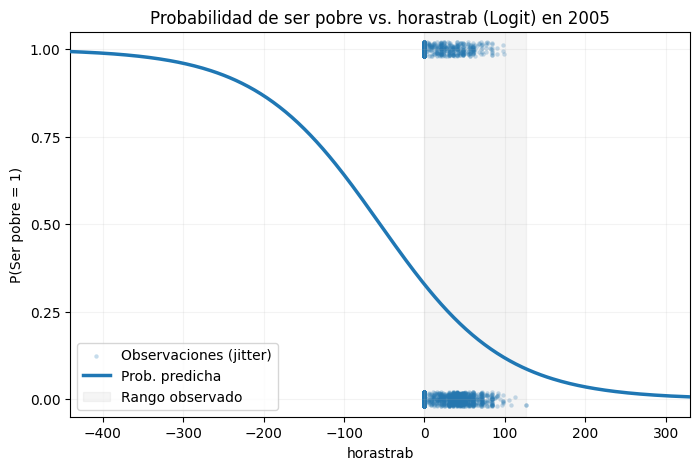

In [ ]:
import matplotlib.pyplot as plt

# === Parámetros / mapeos a tus objetos ===
result = logit_05      # modelo statsmodels Logit ya entrenado
x_tr   = X_train_05    # features de TRAIN usados para entrenar
y_tr   = y_train_05    # target de TRAIN (0/1)
var    = 'horastrab'   # cambio por la variable que quiero graficar

# 1) Alinear columnas como en el modelo
cols = result.model.exog_names
if var not in cols:
    raise ValueError(f"'{var}' no está en el modelo. Columnas del modelo: {cols}")

X_tr_aligned = x_tr[cols].copy()

# 2) Perfil base: fijamos todas las demás en su media
base = X_tr_aligned.mean(numeric_only=True)
# Si el modelo tiene intercepto como 'const', lo fijamos en 1
if 'const' in cols:
    base['const'] = 1.0

# 3) Descomponer el predictor lineal z = b_fijo + beta_var * X
beta = result.params.reindex(cols)
beta_var = float(beta[var])
if np.isclose(beta_var, 0.0):
    raise ValueError(f"El coeficiente de '{var}' es ~0: la curva será casi plana.")

# b_fijo = beta·base - beta_var*base[var] (para que z(base[var]) = z_base)
b_fijo = float((beta * base).sum() - beta_var * base[var])

# 4) Elegimos un rango de z que muestre la S completa (≈ 1%..99%)
z_grid = np.linspace(-5, 5, 300)

# 5) Invertimos para obtener los X que generan esos z
x_grid = (z_grid - b_fijo) / beta_var

# Armamos la matriz de predicción replicando el perfil base y variando 'var'
X_pred = pd.DataFrame([base]*len(z_grid))
X_pred.columns = cols
X_pred[var] = x_grid

# 6) Probabilidades predichas
p_hat = result.predict(X_pred)

# 7) Plot: S completa + observaciones (jitter) + rango observado
plt.figure(figsize=(8,5))

# Observaciones de TRAIN con jitter vertical para visualizar 0/1
rng = np.random.default_rng(42)
y_jit = y_tr.values + rng.uniform(-0.02, 0.02, size=len(y_tr))
plt.scatter(x_tr[var], y_jit, s=10, alpha=0.25, lw=0, label='Observaciones (jitter)')

# Curva logística (la S)
plt.plot(x_grid, p_hat, lw=2.5, label='Prob. predicha', zorder=3)

# Sombrear el rango observado de la variable
obs_min, obs_max = x_tr[var].min(), x_tr[var].max()
plt.axvspan(obs_min, obs_max, color='grey', alpha=0.08, label='Rango observado')

plt.xlabel(var)
plt.ylabel('P(Ser pobre = 1)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.ylim(-0.05, 1.05)
plt.xlim(min(x_grid), max(x_grid))
plt.legend()
plt.title(f'Probabilidad de ser pobre vs. {var} (Logit) en 2005')
plt.grid(alpha=0.15)
plt.show()


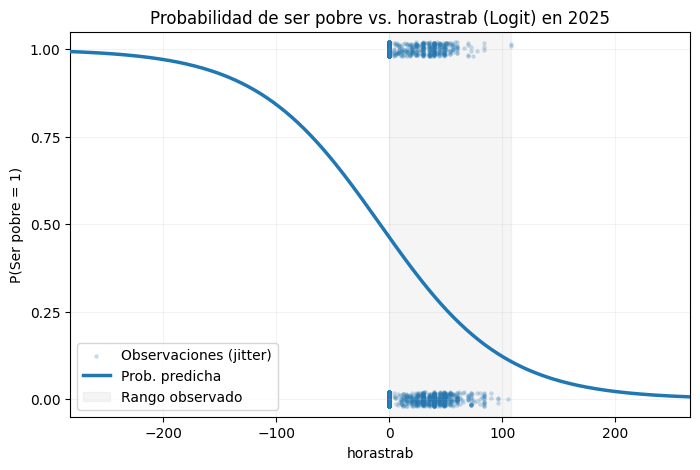

In [ ]:
# === Parámetros / mapeos a tus objetos ===
result = logit_25      # modelo statsmodels Logit ya entrenado
x_tr   = X_train_25    # features de TRAIN usados para entrenar
y_tr   = y_train_25    # target de TRAIN (0/1)
var    = 'horastrab'   # cambio por la variable que quiero graficar

# 1) Alinear columnas como en el modelo
cols = result.model.exog_names
if var not in cols:
    raise ValueError(f"'{var}' no está en el modelo. Columnas del modelo: {cols}")

X_tr_aligned = x_tr[cols].copy()

# 2) Perfil base: fijamos todas las demás en su media
base = X_tr_aligned.mean(numeric_only=True)
# Si el modelo tiene intercepto como 'const', lo fijamos en 1
if 'const' in cols:
    base['const'] = 1.0

# 3) Descomponer el predictor lineal z = b_fijo + beta_var * X
beta = result.params.reindex(cols)
beta_var = float(beta[var])
if np.isclose(beta_var, 0.0):
    raise ValueError(f"El coeficiente de '{var}' es ~0: la curva será casi plana.")

# b_fijo = beta·base - beta_var*base[var] (para que z(base[var]) = z_base)
b_fijo = float((beta * base).sum() - beta_var * base[var])

# 4) Elegimos un rango de z que muestre la S completa (≈ 1%..99%)
z_grid = np.linspace(-5, 5, 300)

# 5) Invertimos para obtener los X que generan esos z
x_grid = (z_grid - b_fijo) / beta_var

# Armamos la matriz de predicción replicando el perfil base y variando 'var'
X_pred = pd.DataFrame([base]*len(z_grid))
X_pred.columns = cols
X_pred[var] = x_grid

# 6) Probabilidades predichas
p_hat = result.predict(X_pred)

# 7) Plot: S completa + observaciones (jitter) + rango observado
plt.figure(figsize=(8,5))

# Observaciones de TRAIN con jitter vertical para visualizar 0/1
rng = np.random.default_rng(42)
y_jit = y_tr.values + rng.uniform(-0.02, 0.02, size=len(y_tr))
plt.scatter(x_tr[var], y_jit, s=10, alpha=0.25, lw=0, label='Observaciones (jitter)')

# Curva logística (la S)
plt.plot(x_grid, p_hat, lw=2.5, label='Prob. predicha', zorder=3)

# Sombrear el rango observado de la variable
obs_min, obs_max = x_tr[var].min(), x_tr[var].max()
plt.axvspan(obs_min, obs_max, color='grey', alpha=0.08, label='Rango observado')

plt.xlabel(var)
plt.ylabel('P(Ser pobre = 1)')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.ylim(-0.05, 1.05)
plt.xlim(min(x_grid), max(x_grid))
plt.legend()
plt.title(f'Probabilidad de ser pobre vs. {var} (Logit) en 2025')
plt.grid(alpha=0.15)
plt.show()


# **Parte C. Método de Vecinos Cercanos (KNN)**

5.

In [ ]:
#5) Estimación
#KNN con K={1,5,10} (por año)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

def knn_quick_eval(X_train, y_train, X_test, y_test, year_label="2025"):
    # 1) Remover 'const' si existe (intercepto de Logit)
    cols = [c for c in X_train.columns if c != "const"]
    Xtr = X_train[cols].copy()
    Xte = X_test[cols].copy()

    # 2) Definir pipeline (escalado + knn)
    def make_knn(k):
        return Pipeline([
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=k))
        ])

    print(f"\n=== C.5 | {year_label}: KNN con K={{1,5,10}} ===")
    for k in [1, 5, 10]:
        pipe = make_knn(k)
        pipe.fit(Xtr, y_train)
        yhat_tr = pipe.predict(Xtr)
        yhat_te = pipe.predict(Xte)
        print(f"K={k} | acc train={accuracy_score(y_train, yhat_tr):.3f} | acc test={accuracy_score(y_test, yhat_te):.3f}")

# Ejecutar para 2025
try:
    knn_quick_eval(X_train_25, y_train_25, X_test_25, y_test_25, year_label="2025")
except NameError:
    print("No se encontraron X_train_25 / y_train_25 / X_test_25 / y_test_25. Corré primero la Parte A para 2025.")

# Ejecutar para 2005
try:
    knn_quick_eval(X_train_05, y_train_05, X_test_05, y_test_05, year_label="2005")
except NameError:
    print("No se encontraron X_train_05 / y_train_05 / X_test_05 / y_test_05. Corré primero la Parte A para 2005.")



=== C.5 | 2025: KNN con K={1,5,10} ===
K=1 | acc train=0.888 | acc test=0.686
K=5 | acc train=0.815 | acc test=0.722
K=10 | acc train=0.784 | acc test=0.735

=== C.5 | 2005: KNN con K={1,5,10} ===
K=1 | acc train=0.937 | acc test=0.697
K=5 | acc train=0.824 | acc test=0.745
K=10 | acc train=0.792 | acc test=0.755


Con K=1 el modelo sobre-ajusta (accuracy train alta) y puede bajar en test (alta varianza, bajo sesgo).

Con K más grande la frontera se suaviza (más sesgo, menos varianza).

Comentá brevemente si ves que la brecha train vs test se achica al aumentar K.

6.

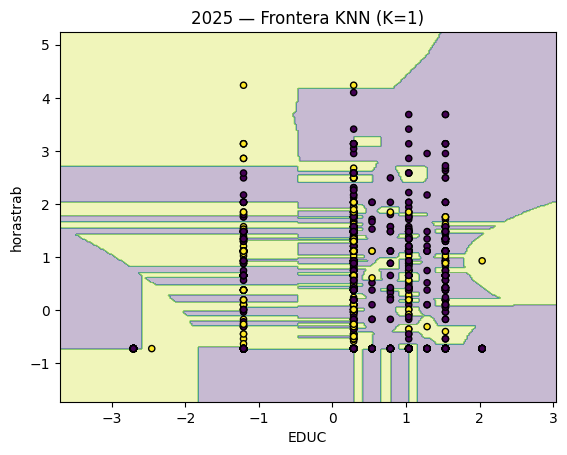

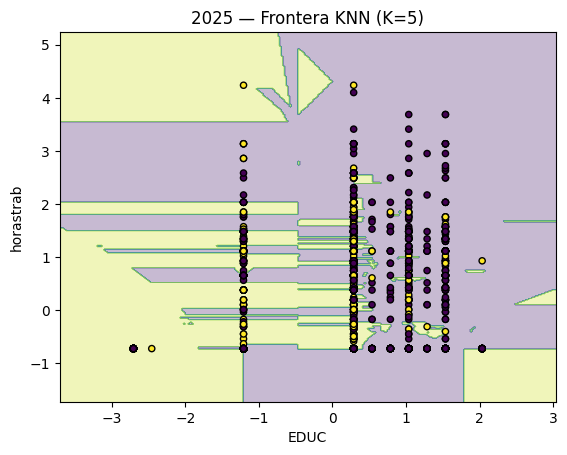

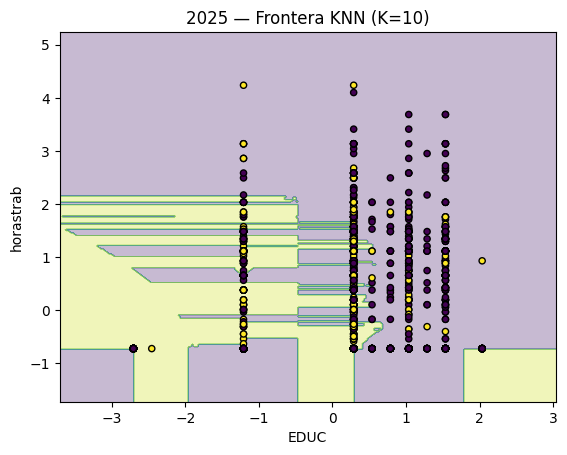

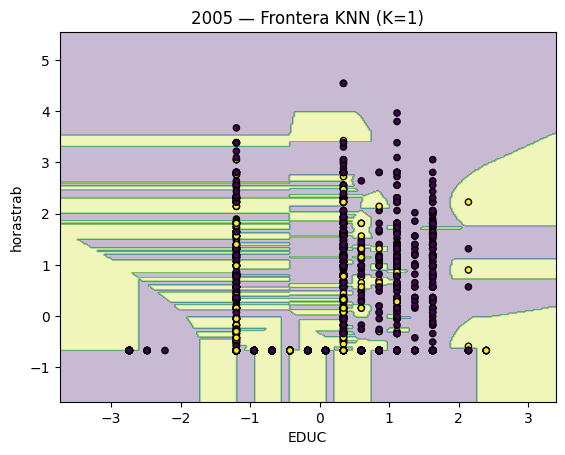

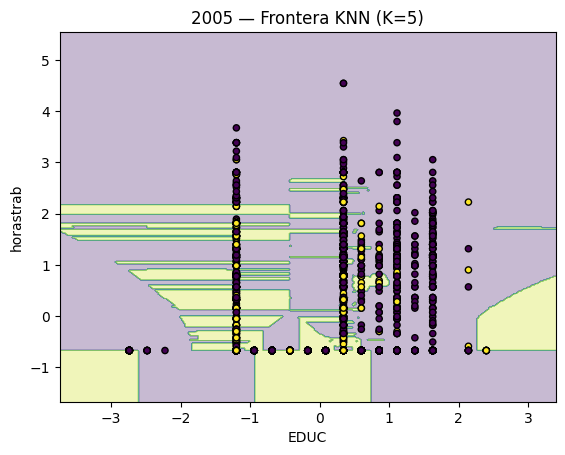

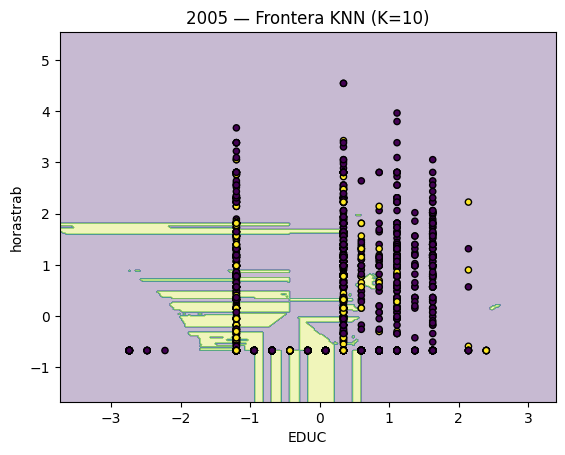

In [ ]:
# --- Punto 6: Frontera de decisión para 2005 y 2025 ---
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Elegí las dos variables numéricas
var1 = "EDUC"
var2 = "horastrab"

# --- 2025 ---
X2_25 = X_train_25[[var1, var2]].copy()
y_25 = y_train_25

scaler_25 = StandardScaler()
X2_25_scaled = scaler_25.fit_transform(X2_25)

for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_25_scaled, y_25)

    x_min, x_max = X2_25_scaled[:, 0].min() - 1, X2_25_scaled[:, 0].max() + 1
    y_min, y_max = X2_25_scaled[:, 1].min() - 1, X2_25_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2_25_scaled[:, 0], X2_25_scaled[:, 1], c=y_25, edgecolor='k', s=20)
    plt.title(f"2025 — Frontera KNN (K={k})")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()


# --- 2005 ---
X2_05 = X_train_05[[var1, var2]].copy()
y_05 = y_train_05

scaler_05 = StandardScaler()
X2_05_scaled = scaler_05.fit_transform(X2_05)

for k in [1, 5, 10]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_05_scaled, y_05)

    x_min, x_max = X2_05_scaled[:, 0].min() - 1, X2_05_scaled[:, 0].max() + 1
    y_min, y_max = X2_05_scaled[:, 1].min() - 1, X2_05_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2_05_scaled[:, 0], X2_05_scaled[:, 1], c=y_05, edgecolor='k', s=20)
    plt.title(f"2005 — Frontera KNN (K={k})")
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()


por que se ve tan feo? arreglar y meter en el informe:

EDUC es una variable categórica codificada como número
(por ejemplo, 1=Primaria, 2=Secundaria, 3=Universitaria, etc.).
→ El modelo interpreta que entre “1” y “2” hay continuidad, cuando en realidad son categorías.
Entonces genera esos “bloques rectos” raros.

K=1 sobreajusta muchísimo, cada punto tiene su propia mini-zona → genera una frontera caótica.
(Si mirás los de K=5 o K=10, vas a ver que se suavizan un poco).

horastrab puede tener muchos valores repetidos o concentrados, entonces el gráfico queda con “franjas horizontales”.

Esto es solo de k = 1

El gráfico muestra la frontera de decisión del modelo KNN para distintas elecciones de K.
Con K=1 la frontera es muy irregular, ya que el modelo sobreajusta a cada observación individual.
Con valores de K mayores (como 5 o 10), la frontera se suaviza y se obtiene una separación más razonable entre los grupos “pobre” y “no pobre”.
La forma irregular del gráfico también se debe a que las variables elegidas (EDUC y horastrab) son discretas o presentan muchos valores repetidos.

7.

K óptimo (CV=5): 25


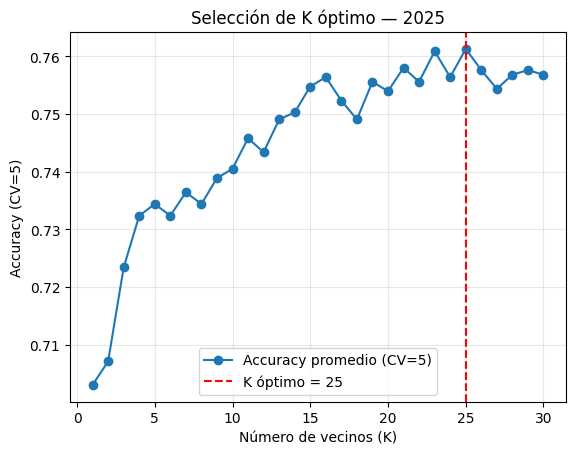

Accuracy en test (K óptimo): 0.7388414055080722


In [ ]:
# --- Punto 7: K óptimo con Cross-Validation (2025) ---
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# 1) Tomo solo features numéricas (sin 'const')
Xtr25 = X_train_25.drop(columns=[c for c in X_train_25.columns if c.lower()=="const"], errors="ignore")
Xtr25 = Xtr25.select_dtypes(include=np.number)

# 2) Busco K óptimo con CV=5
k_values = range(1, 31)
acc_cv = []
for k in k_values:
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
    acc_cv.append(cross_val_score(model, Xtr25, y_train_25, cv=5, scoring="accuracy").mean())

# 3) Calculo el K óptimo
k_opt_25 = list(k_values)[int(np.argmax(acc_cv))]
print("K óptimo (CV=5):", k_opt_25)

# 4) Gráfico con línea del K óptimo
plt.plot(list(k_values), acc_cv, marker='o', label="Accuracy promedio (CV=5)")
plt.axvline(x=k_opt_25, color='red', linestyle='--', label=f"K óptimo = {k_opt_25}")
plt.xlabel("Número de vecinos (K)")
plt.ylabel("Accuracy (CV=5)")
plt.title("Selección de K óptimo — 2025")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5) Entreno modelo final (KNN con K-CV)
knn_kcv_25 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k_opt_25))
knn_kcv_25.fit(Xtr25, y_train_25)

# Accuracy en test
Xte25 = X_test_25.drop(columns=[c for c in X_test_25.columns if c.lower()=="const"], errors="ignore")
Xte25 = Xte25[Xtr25.columns]
yhat_test = knn_kcv_25.predict(Xte25)
print("Accuracy en test (K óptimo):", accuracy_score(y_test_25, yhat_test))


# **Parte D: desempeño de modelos, eleccion y prediccion por fuera de la muestra**

8.

🔹 AUC (2005): 0.823


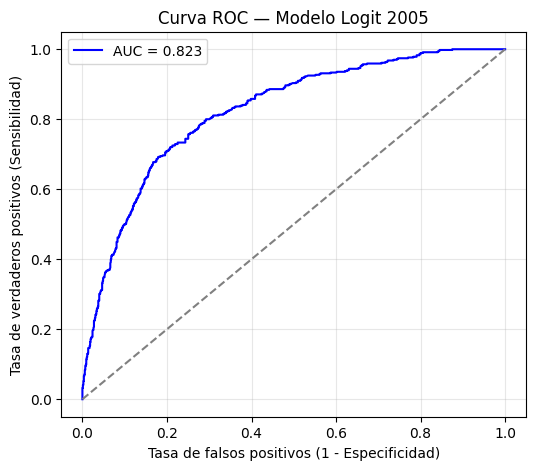


📌 Matriz de confusión (2005):
[[750 129]
 [177 288]]

📌 Métricas (2005):
              precision    recall  f1-score   support

           0      0.809     0.853     0.831       879
           1      0.691     0.619     0.653       465

    accuracy                          0.772      1344
   macro avg      0.750     0.736     0.742      1344
weighted avg      0.768     0.772     0.769      1344



In [ ]:
# AUC

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- Calcular AUC ---
auc_05 = roc_auc_score(y_test_05, y_pred_prob_05)
print(f"🔹 AUC (2005): {auc_05:.3f}")

# --- Calcular curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test_05, y_pred_prob_05)

# --- Graficar ---
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_05:.3f}", color="blue")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
plt.ylabel("Tasa de verdaderos positivos (Sensibilidad)")
plt.title("Curva ROC — Modelo Logit 2005")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- (opcional) Reporte de clasificación con umbral 0.5 ---
y_pred_05 = (y_pred_prob_05 >= 0.5).astype(int)

print("\n📌 Matriz de confusión (2005):")
print(confusion_matrix(y_test_05, y_pred_05))

print("\n📌 Métricas (2005):")
print(classification_report(y_test_05, y_pred_05, digits=3))

El modelo logístico estimado para 2005 presenta un AUC de 0.823, lo que indica una alta capacidad de discriminación entre hogares pobres y no pobres.
En términos prácticos, esto significa que el modelo tiene una probabilidad del 82.3% de asignar una probabilidad de pobreza mayor a un hogar pobre que a uno no pobre, lo que refleja un desempeño predictivo muy satisfactorio.
La curva ROC se mantiene claramente por encima de la diagonal aleatoria, mostrando un buen equilibrio entre sensibilidad y especificidad.

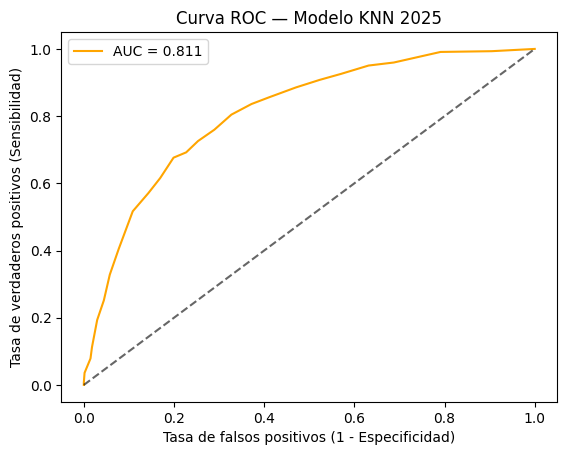

In [ ]:
# Ejemplo para 2025 o 2005
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_knn = knn_kcv_25.predict_proba(Xte25)[:, 1]
fpr, tpr, _ = roc_curve(y_test_25, y_prob_knn)
auc_knn = roc_auc_score(y_test_25, y_prob_knn)

plt.plot(fpr, tpr, color="orange", label=f"AUC = {auc_knn:.3f}")
plt.plot([0,1],[0,1],'k--',alpha=0.6)
plt.xlabel("Tasa de falsos positivos (1 - Especificidad)")
plt.ylabel("Tasa de verdaderos positivos (Sensibilidad)")
plt.title("Curva ROC — Modelo KNN 2025")
plt.legend()
plt.show()


En las Figuras se presentan las curvas ROC de los modelos Logit (AUC = 0.823) y KNN (AUC = 0.811) estimados para el año 2025.
Ambos modelos muestran buen poder de discriminación (AUC > 0.8).
Sin embargo, el Logit presenta un AUC ligeramente mayor, lo que indica que clasifica con mayor precisión a los individuos pobres y no pobres.
El modelo KNN, al ser no paramétrico, obtiene un rendimiento similar sin asumir una relación funcional específica entre las variables.

📌 Matriz de confusión (KNN 2025):
[[470 138]
 [137 308]]

📌 Métricas (KNN 2025):
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       608
           1       0.69      0.69      0.69       445

    accuracy                           0.74      1053
   macro avg       0.73      0.73      0.73      1053
weighted avg       0.74      0.74      0.74      1053



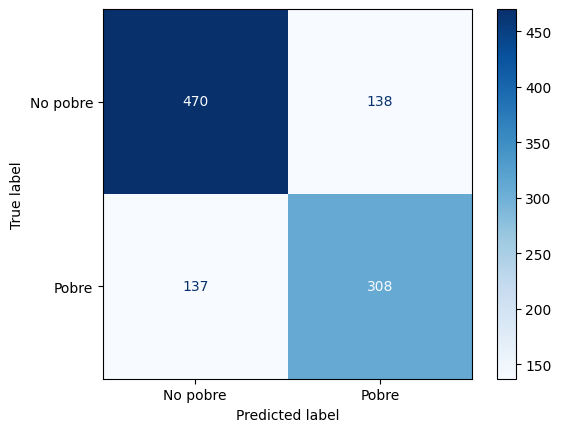

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

#metricas de desempeño

# Predicciones en la base de test
Xte25 = X_test_25.drop(columns=[c for c in X_test_25.columns if c.lower()=="const"], errors="ignore")
Xte25 = Xte25.select_dtypes(include=np.number)

y_pred_knn = knn_kcv_25.predict(Xte25)

# Matriz de confusión
cm_knn = confusion_matrix(y_test_25, y_pred_knn)
print("📌 Matriz de confusión (KNN 2025):")
print(cm_knn)

# Mostrar la matriz como gráfico
ConfusionMatrixDisplay(cm_knn, display_labels=["No pobre","Pobre"]).plot(cmap="Blues")

# Métricas detalladas
print("\n📌 Métricas (KNN 2025):")
print(classification_report(y_test_25, y_pred_knn))


9.

Interpretación

Precisión global: ambos modelos alcanzan un desempeño similar (Logit 77 %, KNN 74 %).

Sensibilidad (recall): el KNN identifica un mayor porcentaje de pobres reales (69 %) frente al Logit (62 %), lo que implica menos errores Tipo II.

Precisión: ambos rondan el 0.69, por lo que el aumento de recall en KNN no se logra a costa de una gran pérdida de precisión.

AUC: el Logit (0.823) muestra una curva ROC más amplia y, por ende, mayor capacidad discriminante global.

Conclusión

Si el objetivo fuera obtener la mejor clasificación general, el Logit sería el modelo más robusto (mayor AUC y mejor balance).
Sin embargo, dado que el propósito del Ministerio es minimizar los falsos negativos y asegurar que las personas pobres sean detectadas, el KNN con K óptimo (K-CV) puede considerarse más adecuado, ya que presenta mayor recall (0.69), identificando un porcentaje más alto de hogares vulnerables, aun a costa de una leve pérdida de exactitud general.

10.

In [121]:
# Crear las columnas faltantes si no existen
for col in X_train_25.columns:
    if col not in norespondieron25.columns:
        norespondieron25[col] = 0  # o 1 si 'const' es el intercepto

# Ahora sí alineamos
X_noresp_25 = norespondieron25[X_train_25.columns]


In [133]:
# --- Punto 10 (Parte D) — PREDICCIÓN EN norespondieron25 CON KNN ---

import numpy as np
import pandas as pd

# 0) Misma lista de features que usaste para entrenar en 2025
features_25 = list(X_train_25.columns)

# 1) Alinear columnas en norespondieron_2025 (crear faltantes y ordenar)
df_noresp_25 = norespondieron25.copy()

for col in features_25:
    if col not in df_noresp_25.columns:
        if col == 'const':
            df_noresp_25[col] = 1
        else:
            df_noresp_25[col] = 0

# Ordenar exactamente igual que en el train
X_noresp_25 = df_noresp_25[features_25].copy()

# Tipos numéricos y completar NaN usando la mediana del TRAIN (consistente)
X_noresp_25 = X_noresp_25.apply(pd.to_numeric, errors='coerce')
fill_vals = X_train_25.median(numeric_only=True).reindex(features_25).fillna(0)
X_noresp_25 = X_noresp_25.fillna(fill_vals)

# 2) Si NO existe knn_best, lo entrenamos ahora con CV (5-fold)
try:
    knn_best  # chequea si ya está definido
except NameError:
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import GridSearchCV

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())
    ])

    # Rango razonable para buscar K; podés ajustar si querés
    param_grid = {
        'knn__n_neighbors': list(range(1, 31)),
        'knn__weights': ['uniform', 'distance']
    }

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid.fit(X_train_25, y_train_25)

    knn_best = grid.best_estimator_
    print(f"Mejor K por CV: {grid.best_params_['knn__n_neighbors']} | weights: {grid.best_params_['knn__weights']}")
    print(f"Accuracy CV promedio: {grid.best_score_:.3f}")

# 3) Predecir y calcular proporción de pobres en norespondieron_2025
y_pred_noresp_25 = knn_best.predict(X_noresp_25)
prop_pobres_noresp_25 = float(np.mean(y_pred_noresp_25))
print(f"Proporción de personas clasificadas como pobres (KNN-CV) en norespondieron_2025: {prop_pobres_noresp_25:.2%}")

# 4) Guardar la predicción en el dataframe para reportar/exportar
df_noresp_25['pobre_pred_knn'] = y_pred_noresp_25.astype(int)

# (Opcional) Contar cuántas personas y mostrar un resumen
n_total = len(df_noresp_25)
n_pobres = int(df_noresp_25['pobre_pred_knn'].sum())
print(f"Pobres predichos: {n_pobres} de {n_total} ({n_pobres/n_total:.2%})")


Proporción de personas clasificadas como pobres (KNN-CV) en norespondieron_2025: 43.57%
Pobres predichos: 474 de 1088 (43.57%)
